In [1]:
import pandas as pd
import numpy as np

TARGET_CODES = [
    'SP.POP.TOTL',
    'NV.AGR.TOTL.ZS',
    'NY.GDP.PCAP.CD'
]

wb_data = 'P_Popular Indicators/Popular_Indicators_Wide.csv'

df_wb_wide = pd.read_csv(wb_data)

#Filter the DataFrame to only include the necessary 3 indicators
df_wb_wide_filtered = df_wb_wide[df_wb_wide['Series Code'].isin(TARGET_CODES)].copy()

# Step 2: Melt the filtered DataFrame from Wide to Long format

# Identify the columns that contain year data (the ones we want to melt)
# In your file, the columns start after 'Country Code'
# We'll select columns 4 and up
year_cols = df_wb_wide_filtered.columns[4:] 

df_wb_long = df_wb_wide_filtered.melt(
    id_vars=['Series Name', 'Series Code', 'Country Name', 'Country Code'],
    value_vars=year_cols,                 # Only melt the year columns
    var_name='Year_Raw',
    value_name='Value'
)

# Extract the first four digits (the year) from the 'Year_Raw' column
df_wb_long['Year'] = df_wb_long['Year_Raw'].str.extract('(\d{4})').astype(int)

# Drop the raw year column and only keep the clean 'Year' column
df_wb_long = df_wb_long.drop(columns=['Year_Raw'])

# Drop rows where 'Value' is missing (which is marked as '..') and convert to numeric
df_wb_long = df_wb_long[df_wb_long['Value'] != '..'].copy()
df_wb_long['Value'] = pd.to_numeric(df_wb_long['Value'])

In [2]:
df_wb_long.head()

,Series Name,Series Code,Country Name,Country Code,Value,Year
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20130327.0,2000
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027.0,2000
2,"Population, total",SP.POP.TOTL,Algeria,DZA,30903893.0,2000
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,56855.0,2000
4,"Population, total",SP.POP.TOTL,Andorra,AND,65685.0,2000


In [3]:
wb_countries = set(df_wb_long['Country Name'].unique())

wb_countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Channel Islands',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt, Arab Rep.',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'Fren

In [4]:
import os

# Base folder (relative to your Capstone.ipynb)
FAO_BASE = 'FAO Data'

files = {
    'fertilizers': os.path.join(
        FAO_BASE,
        'Inputs_FertilizersNutrient_E_All_Data_(Normalized)',
        'Inputs_FertilizersNutrient_E_All_Data_(Normalized).csv'
    ),
    'land_use': os.path.join(
        FAO_BASE,
        'Inputs_LandUse_E_All_Data_(Normalized)',
        'Inputs_LandUse_E_All_Data_(Normalized).csv'
    ),
    'pesticides': os.path.join(
        FAO_BASE,
        'Inputs_Pesticides_Use_E_All_Data_(Normalized)',
        'Inputs_Pesticides_Use_E_All_Data_(Normalized).csv'
    ),
    'crops_livestock': os.path.join(
        FAO_BASE,
        'Production_Crops_Livestock_E_All_Data_(Normalized)',
        'Production_Crops_Livestock_E_All_Data_(Normalized).csv'
    )
}

# Read each CSV into a DataFrame (these are big, so low_memory=False helps)
df_fert = pd.read_csv(files['fertilizers'], low_memory=False)
df_land = pd.read_csv(files['land_use'], low_memory=False)
df_pest = pd.read_csv(files['pesticides'], low_memory=False)
df_crops = pd.read_csv(files['crops_livestock'], low_memory=False)

# Quick sanity checks
print(df_fert.shape, df_land.shape, df_pest.shape, df_crops.shape, df_wb_long.shape)

(241859, 13) (413211, 13) (103622, 13) (4116252, 14) (34131, 6)


In [5]:
df_fert.head()

,Area Code,Area Code (M49),Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag,Note
0,2,'004,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1974,1974,t,19117.0,A,Official data from questionnaire
1,2,'004,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1975,1975,t,14774.0,A,Official data from questionnaire
2,2,'004,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1976,1976,t,26203.0,A,Official data from questionnaire
3,2,'004,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1977,1977,t,37689.0,A,Official data from questionnaire
4,2,'004,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1978,1978,t,48300.0,A,Official data from questionnaire


In [6]:
wb_countries = set(df_wb_long['Country Name'].unique())
fao_countries = set(df_fert['Area'].unique())

wb_not_in_fao = wb_countries - fao_countries

#returns the length of the list of countries that dont share a name in the FAO vs wb datasets, then returns the actual countries names
print(len(wb_not_in_fao))
wb_not_in_fao

48


{'American Samoa',
 'Andorra',
 'Bahamas, The',
 'Bolivia',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Curacao',
 'Egypt, Arab Rep.',
 'Gambia, The',
 'Gibraltar',
 'Guam',
 'Hong Kong SAR, China',
 'Iran, Islamic Rep.',
 'Isle of Man',
 "Korea, Dem. People's Rep.",
 'Korea, Rep.',
 'Kosovo',
 'Kyrgyz Republic',
 'Lao PDR',
 'Liechtenstein',
 'Macao SAR, China',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Monaco',
 'Netherlands',
 'Northern Mariana Islands',
 'Puerto Rico (US)',
 'San Marino',
 'Sint Maarten (Dutch part)',
 'Slovak Republic',
 'Somalia, Fed. Rep.',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'Tanzania',
 'Turkiye',
 'Turks and Caicos Islands',
 'United Kingdom',
 'United States',
 'Venezuela, RB',
 'Virgin Islands (U.S.)',
 'West Bank and Gaza',
 'Yemen, Rep.'}

In [7]:
fao_not_in_wb  = fao_countries - wb_countries

print(len(fao_not_in_wb))
fao_not_in_wb

112


{'Africa',
 'Africa (excluding intra-trade)',
 'Americas',
 'Americas (excluding intra-trade)',
 'Asia',
 'Asia (excluding intra-trade)',
 'Australia and New Zealand',
 'Australia and New Zealand (excluding intra-trade)',
 'Bahamas',
 'Belgium-Luxembourg',
 'Bolivia (Plurinational State of)',
 'Caribbean',
 'Caribbean (excluding intra-trade)',
 'Central America',
 'Central America (excluding intra-trade)',
 'Central Asia',
 'Central Asia (excluding intra-trade)',
 'China, Hong Kong SAR',
 'China, Taiwan Province of',
 'China, mainland',
 'Congo',
 'Cook Islands',
 'Czechoslovakia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Eastern Africa',
 'Eastern Africa (excluding intra-trade)',
 'Eastern Asia',
 'Eastern Asia (excluding intra-trade)',
 'Eastern Europe',
 'Eastern Europe (excluding intra-trade)',
 'Egypt',
 'Ethiopia PDR',
 'Europe',
 'Europe (excluding intra-trade)',
 'European Union (27)',
 'European Union (27) (excluding in

In [8]:
unwanted_fao_areas = [
    'Africa',
    'Africa (excluding intra-trade)',
    'Americas',
    'Americas (excluding intra-trade)',
    'Asia',
    'Asia (excluding intra-trade)',
    'Australia and New Zealand',
    'Australia and New Zealand (excluding intra-trade)',
    'Belgium-Luxembourg',
    'Caribbean',
    'Caribbean (excluding intra-trade)',
    'Central America',
    'Central America (excluding intra-trade)',
    'Central Asia',
    'Central Asia (excluding intra-trade)',
    'Cook Islands',
    'Czechoslovakia',
    'Eastern Africa',
    'Eastern Africa (excluding intra-trade)',
    'Eastern Asia',
    'Eastern Asia (excluding intra-trade)',
    'Eastern Europe',
    'Eastern Europe (excluding intra-trade)',
    'Ethiopia PDR',
    'Europe',
 'Europe (excluding intra-trade)',
 'European Union (27)',
 'European Union (27) (excluding intra-trade)',
 'European Union (28) (excluding intra-trade)',
 'Guadeloupe',
    'French Guiana',
'Land Locked Developing Countries (LLDCs)',
 'Land Locked Developing Countries (excluding intra-trade)',
'Least Developed Countries (LDCs)',
 'Least Developed Countries (excluding intra-trade)',
 'Low Income Food Deficit Countries (LIFDCs)',
 'Low Income Food Deficit Countries (excluding intra-trade)',
'Martinique',
 'Melanesia',
 'Melanesia (excluding intra-trade)',
 'Micronesia',
 'Micronesia (Federated States of)',
 'Micronesia (excluding intra-trade)',
 'Middle Africa',
 'Middle Africa (excluding intra-trade)',
 'Net Food Importing Developing Countries (NFIDCs)',
 'Net Food Importing Developing Countries (excluding intra-trade)',
'Northern Africa',
 'Northern Africa (excluding intra-trade)',
 'Northern America',
 'Northern America (excluding intra-trade)',
 'Northern Europe',
 'Northern Europe (excluding intra-trade)',
 'Oceania',
 'Oceania (excluding intra-trade)',
 'Palestine',
 'Polynesia',
 'Polynesia (excluding intra-trade)',
'Réunion',
'Serbia and Montenegro',
'Small Island Developing States (SIDS)',
 'Small Island Developing States (excluding intra-trade)',
'South America',
 'South America (excluding intra-trade)',
 'South-Eastern Asia (excluding intra-trade)',
 'South-eastern Asia',
 'Southern Africa',
 'Southern Africa (excluding intra-trade)',
 'Southern Asia',
 'Southern Asia (excluding intra-trade)',
 'Southern Europe',
 'Southern Europe (excluding intra-trade)',
 'Sudan (former)',
 'USSR',
 'Western Africa',
 'Western Africa (excluding intra-trade)',
 'Western Asia',
 'Western Asia (excluding intra-trade)',
 'Western Europe',
 'Western Europe (excluding intra-trade)',
 'World',
'Yugoslav SFR'
]

def filter_unwanted(df):
    return df[~df['Area'].isin(unwanted_fao_areas)].copy()

df_fert  = filter_unwanted(df_fert)
df_land  = filter_unwanted(df_land)
df_pest  = filter_unwanted(df_pest)
df_crops = filter_unwanted(df_crops)

In [9]:
fert_countries  = set(df_fert['Area'])
land_countries  = set(df_land['Area'])
pest_countries  = set(df_pest['Area'])
crops_countries = set(df_crops['Area'])

print(len(fert_countries), len(land_countries), len(pest_countries), len(crops_countries))

199 236 211 197


In [10]:
#combining the three unique Chinese regions in the FAO dataset to all fall under "China"

china_areas = [
    'China, mainland',
    'China, Hong Kong SAR',
    'China, Taiwan Province of',
    'China, Macao SAR'
]
df_fert.loc[df_fert['Area'].isin(china_areas), 'Area'] = 'China'
df_land.loc[df_land['Area'].isin(china_areas), 'Area'] = 'China'
df_pest.loc[df_pest['Area'].isin(china_areas), 'Area'] = 'China'
df_crops.loc[df_crops['Area'].isin(china_areas), 'Area'] = 'China'

In [11]:
wb_china_areas = [
    'Hong Kong SAR, China', 
    'Macao SAR, China',
]
df_wb_long.loc[df_wb_long['Country Name'].isin(wb_china_areas), 'Country Name'] = 'China'

In [12]:
#creating a dictionary of country names that are not the same in WB vs FAO. Providing the WB name first and corresponding 
#FAO name after for replacement

country_correction = {
    'Bahamas, The':'Bahamas',
    'Bolivia' : 'Bolivia (Plurinational State of)',
    'Cote d\'Ivoire' : 'Côte d\'Ivoire',
    'Congo, Dem. Rep.' : 'Democratic Republic of the Congo',
    'Congo, Rep.' : 'Congo',
    'Egypt, Arab Rep.' : 'Egypt',
    'Korea, Dem. People\'s Rep.' : 'Democratic People\'s Republic of Korea',
    'Gambia, The' : 'Gambia',
    'Iran, Islamic Rep.' : 'Iran (Islamic Republic of)',
    'Kyrgyz Republic' : 'Kyrgyzstan',
    'Lao PDR' : 'Lao People\'s Democratic Republic',
    'Netherlands' : 'Netherlands (Kingdom of the)',
    'Puerto Rico (US)' : 'Puerto Rico',
    'Korea, Rep.' : 'Republic of Korea',
    'Moldova' : 'Republic of Moldova',
    'St. Kitts and Nevis' : 'Saint Kitts and Nevis',
    'St. Lucia' : 'Saint Lucia',
    'St. Vincent and the Grenadines' : 'Saint Vincent and the Grenadines',
    'Slovak Republic' : 'Slovakia',
    'Somalia, Fed. Rep.' : 'Somalia',
    'Turkiye' : 'Türkiye',
    'United Kingdom' : 'United Kingdom of Great Britain and Northern Ireland',
    'Tanzania' : 'United Republic of Tanzania',
    'United States' : 'United States of America',
    'Venezuela, RB' : 'Venezuela (Bolivarian Republic of)',
    'Yemen, Rep.' : 'Yemen'
    
    
}

df_wb_long['Country Name'] = (
    df_wb_long['Country Name'].replace(country_correction)
)

In [13]:
remaining = set(df_wb_long['Country Name']) - set(df_fert['Area'])
print(sorted(remaining))

#WB entities that have no agricultural data in FAO

['American Samoa', 'Andorra', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Curacao', 'Gibraltar', 'Guam', 'Isle of Man', 'Kosovo', 'Liechtenstein', 'Micronesia, Fed. Sts.', 'Monaco', 'Northern Mariana Islands', 'San Marino', 'Sint Maarten (Dutch part)', 'St. Martin (French part)', 'Turks and Caicos Islands', 'Virgin Islands (U.S.)', 'West Bank and Gaza']


In [14]:
#removing sudan (former) from all FAO DF's




#THIS MIGHT ACTUALLY BE UNNECESSARY BECAUSE 'SUDAN (FORMER)' WAS ALREADY LISTED IN THE unwanted_fao_areas LIST





fao_dfs = {
    'df_fert': df_fert,
    'df_land': df_land,
    'df_pest': df_pest,
    'df_crops': df_crops
}

# Remove sudan (former) from all FAO datasets
for name, df in fao_dfs.items():
    fao_dfs[name] = df[df['Area'] != 'Sudan (former)']

# Reassign cleaned DataFrames
df_fert   = fao_dfs['df_fert']
df_land   = fao_dfs['df_land']
df_pest   = fao_dfs['df_pest']
df_crops  = fao_dfs['df_crops']

In [15]:
wb_countries = set(df_wb_long['Country Name'].unique())
fao_countries = set(df_fert['Area'].unique())
fao_not_in_wb  = fao_countries - wb_countries

print(len(fao_not_in_wb))
fao_not_in_wb


1


{'Niue'}

In [16]:
# 1. Build country sets for each dataframe
fert_countries  = set(df_fert['Area'].unique())              # baseline (FAO fertilizers)
land_countries  = set(df_land['Area'].unique())              # FAO land use
pest_countries  = set(df_pest['Area'].unique())              # FAO pesticides
crops_countries = set(df_crops['Area'].unique())             # FAO crops & livestock
wb_countries    = set(df_wb_long['Country Name'].unique())   # World Bank

# 2. Put them in a dict so we can loop nicely
country_sets = {
    'fert (baseline)': fert_countries,
    'land'           : land_countries,
    'pest'           : pest_countries,
    'crops'          : crops_countries,
    'world_bank'     : wb_countries
}

# 3. Helper to pretty-print differences vs baseline
baseline_name = 'fert (baseline)'
baseline_set  = country_sets[baseline_name]

def show_diff(name, other_set):
    print(f"\n=== Comparing {name} vs {baseline_name} ===")
    only_in_other   = sorted(other_set - baseline_set)
    only_in_baseline = sorted(baseline_set - other_set)

    print(f"{name}: {len(other_set)} unique countries")
    print(f"{baseline_name}: {len(baseline_set)} unique countries\n")

    print(f"→ In {name} but NOT in baseline:")
    print(only_in_other if only_in_other else "  (none)")

    print(f"\n→ In baseline but NOT in {name}:")
    print(only_in_baseline if only_in_baseline else "  (none)")
    print("-" * 60)

# 4. Run comparisons for each other dataframe
for name, cset in country_sets.items():
    if name == baseline_name:
        continue
    show_diff(name, cset)


=== Comparing land vs fert (baseline) ===
land: 232 unique countries
fert (baseline): 196 unique countries

→ In land but NOT in baseline:
['American Samoa', 'Andorra', 'Anguilla', 'Ascension, Saint Helena and Tristan da Cunha', 'Bonaire, Sint Eustatius and Saba', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Curaçao', 'Falkland Islands (Malvinas)', 'Gibraltar', 'Guam', 'Holy See', 'Isle of Man', 'Latin America and the Caribbean', 'Liechtenstein', 'Mayotte', 'Monaco', 'Montserrat', 'Netherlands Antilles (former)', 'Norfolk Island', 'Northern Mariana Islands', 'OECD', 'Pacific Islands Trust Territory', 'Pitcairn', 'Saint Barthélemy', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'San Marino', 'Sint Maarten (Dutch part)', 'Sub-Saharan Africa', 'Tokelau', 'Turks and Caicos Islands', 'United States Virgin Islands', 'Wallis and Futuna Islands', 'Western Sahara']

→ In baseline but NOT in land:
  (none)
---------------------------------------------------------

In [17]:
# Use fertilizer countries as the master country universe
master_countries = set(df_fert['Area'].unique())

# Restrict FAO tables
df_land  = df_land[df_land['Area'].isin(master_countries)]
df_pest  = df_pest[df_pest['Area'].isin(master_countries)]
df_crops = df_crops[df_crops['Area'].isin(master_countries)]

# Restrict World Bank table
df_wb_long = df_wb_long[
    df_wb_long['Country Name'].isin(master_countries)
]

In [18]:
datasets = {
    'fert': set(df_fert['Area']),
    'land': set(df_land['Area']),
    'pest': set(df_pest['Area']),
    'crops': set(df_crops['Area']),
    'wb':   set(df_wb_long['Country Name'])
}

for name, s in datasets.items():
    print(name, len(s), s == master_countries)

fert 196 True
land 196 True
pest 188 False
crops 192 False
wb 195 False


In [19]:
df_wb_long = df_wb_long.rename(columns={'Country Name': 'Area'})

In [20]:
df_wb_long_countries = set(df_wb_long['Area'].unique())

df_wb_long_countries

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',


In [21]:
print(df_fert.shape, df_land.shape, df_pest.shape, df_crops.shape, df_wb_long.shape)

(184652, 13) (308949, 13) (85736, 13) (2952581, 14) (32150, 6)


In [22]:
import sqlite3

conn = sqlite3.connect('capstone.db')

In [23]:
#BY RE-RUNNING THIS BLOCK OF CODE, THE SQL TABLES WILL BE OVERRIDDEN (if_exists='replace')



df_fert.to_sql(
    'fao_fertilizers',
    conn,
    if_exists='replace',
    index=False
)

df_land.to_sql(
    'fao_land_use',
    conn,
    if_exists='replace',
    index=False
)

df_pest.to_sql(
    'fao_pesticides',
    conn,
    if_exists='replace',
    index=False
)

df_crops.to_sql(
    'fao_crops_livestock',
    conn,
    if_exists='replace',
    index=False
)

df_wb_long.to_sql(
    'world_bank',
    conn,
    if_exists='replace',
    index=False
)


32150

In [24]:
conn.close()

In [25]:
print(df_wb_long.shape)

#verifying that the "31215" output from the .to_sql() command worked 
#to.sql() returns the number of rows succesfully inserted into the SQLite table so it should match the number of rows from .shape()

(32150, 6)


In [26]:
df_wb_long.head()

,Series Name,Series Code,Area,Country Code,Value,Year
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,20130327.0,2000
1,"Population, total",SP.POP.TOTL,Albania,ALB,3089027.0,2000
2,"Population, total",SP.POP.TOTL,Algeria,DZA,30903893.0,2000
5,"Population, total",SP.POP.TOTL,Angola,AGO,16194869.0,2000
6,"Population, total",SP.POP.TOTL,Antigua and Barbuda,ATG,74912.0,2000


In [40]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

db_path = "capstone.db"
conn = sqlite3.connect(db_path)

sql = """
SELECT *
FROM master_country_year
"""
master = pd.read_sql(sql, conn)

conn.close()

#sanity checks
print(master.shape)      # should be (5713, 14) 11 metrics + year + country code + area
print(master.head())
print(master.dtypes)

#verifying numeric columns are numeric 
num_cols = [
    "pop_total",
    "gdp_per_capita",
    "agr_va_pct_gdp",
    "ag_land_1000ha",
    "arable_land_1000ha",
    "cropland_1000ha",
    "fert_total_tonnes",
    "pest_total_tonnes",
    "total_crop_production_t",
    "total_crop_area_ha",
    "avg_yield_t_per_ha",
]
master[num_cols] = master[num_cols].apply(pd.to_numeric, errors="coerce")

(5713, 14)
          Area Country_Code  Year   pop_total  agr_va_pct_gdp  gdp_per_capita  \
0  Afghanistan          AFG  1995  17065836.0             NaN             NaN   
1  Afghanistan          AFG  1996  17763266.0             NaN             NaN   
2  Afghanistan          AFG  1997  18452091.0             NaN             NaN   
3  Afghanistan          AFG  1998  19159996.0             NaN             NaN   
4  Afghanistan          AFG  1999  19887785.0             NaN             NaN   

   ag_land_1000ha  arable_land_1000ha  cropland_1000ha  fert_total_tonnes  \
0         37763.0              7653.0           7763.0                NaN   
1         37757.0              7647.0           7757.0             5000.0   
2         37795.0              7685.0           7795.0             5000.0   
3         37868.0              7757.0           7868.0             7000.0   
4         37764.0              7653.0           7764.0             5000.0   

   pest_total_tonnes  total_crop_produc

# 1. Define Efficiency Metrics

Building on the master_country_year data, im now creating derived metrics.

In [15]:
#1.0

import warnings
warnings.filterwarnings('ignore')

import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

db_path = "capstone.db"
conn = sqlite3.connect(db_path)
master = pd.read_sql("SELECT * FROM master_country_year", conn)
conn.close()

# Force numeric types
num_cols = [
    "pop_total", "gdp_per_capita", "agr_va_pct_gdp",
    "ag_land_1000ha", "arable_land_1000ha", "cropland_1000ha",
    "fert_total_tonnes", "pest_total_tonnes",
    "total_crop_production_t", "total_crop_area_ha", "avg_yield_t_per_ha",
]
master[num_cols] = master[num_cols].apply(pd.to_numeric, errors="coerce")

print(f"Master data loaded: {master.shape[0]} rows, {master.shape[1]} columns")
print(f"Countries: {master['Area'].nunique()}, Years: {master['Year'].min()}-{master['Year'].max()}")

Master data loaded: 5713 rows, 14 columns
Countries: 195, Years: 1995-2023


In [16]:
#1.1 INPUT INTENSITY METRICS (inputs per hectare of agricultural land)

# Helper function safely computes ratios (avoids division by zero / inf)
def safe_ratio(numerator, denominator, scale=1.0):
    """Compute ratio, returning NaN where denominator is zero or missing."""
    result = np.where(
        (denominator > 0) & denominator.notna() & numerator.notna(),
        (numerator * scale) / denominator,
        np.nan
    )
    return result

# Fertilizer intensity: kg fertilizer per hectare of agricultural land
# fert_total_tonnes * 1000 (to kg) / ag_land_1000ha * 1000 (to ha) = fert_tonnes / ag_land_1000ha
master["fert_kg_per_ha"] = safe_ratio(
    master["fert_total_tonnes"], 
    master["ag_land_1000ha"],
    scale=1.0  # tonnes/1000ha = kg/ha
)

# Pesticide intensity: kg pesticides per hectare of agricultural land
master["pest_kg_per_ha"] = safe_ratio(
    master["pest_total_tonnes"],
    master["ag_land_1000ha"],
    scale=1.0
)

# Combined chemical intensity: total fertilizer + pesticide kg per ha
master["chem_kg_per_ha"] = master["fert_kg_per_ha"].fillna(0) + master["pest_kg_per_ha"].fillna(0)
# Set to NaN if both components were NaN
both_missing = master["fert_kg_per_ha"].isna() & master["pest_kg_per_ha"].isna()
master.loc[both_missing, "chem_kg_per_ha"] = np.nan

In [17]:
# 1.2 OUTPUT / PRODUCTIVITY METRICS


# Crop production intensity: tonnes per hectare of harvested crop area
# (This is essentially average yield, but computed from totals)
master["crop_t_per_ha"] = safe_ratio(
    master["total_crop_production_t"],
    master["total_crop_area_ha"],
    scale=1.0
)

# Crop production per capita: tonnes of crops per person
master["crop_t_per_capita"] = safe_ratio(
    master["total_crop_production_t"],
    master["pop_total"],
    scale=1.0
)

# Agricultural land per capita: hectares per person
master["ag_land_ha_per_capita"] = safe_ratio(
    master["ag_land_1000ha"] * 1000,  # convert to hectares
    master["pop_total"],
    scale=1.0
)

In [18]:
# 1.3 RESOURCE EFFICIENCY METRICS (output per unit of input)

# Crop tonnes per kg of fertilizer (higher = more efficient use of fertilizer)
# This measures how much crop output you get per unit of fertilizer input
master["crop_t_per_fert_kg"] = safe_ratio(
    master["total_crop_production_t"],
    master["fert_total_tonnes"] * 1000,  # convert to kg
    scale=1.0
)

# Crop tonnes per kg of pesticide
master["crop_t_per_pest_kg"] = safe_ratio(
    master["total_crop_production_t"],
    master["pest_total_tonnes"] * 1000,  # convert to kg
    scale=1.0
)

# Crop tonnes per kg of total chemicals (fertilizer + pesticide)
total_chem_kg = (master["fert_total_tonnes"].fillna(0) + master["pest_total_tonnes"].fillna(0)) * 1000
master["crop_t_per_chem_kg"] = safe_ratio(
    master["total_crop_production_t"],
    pd.Series(total_chem_kg),
    scale=1.0
)


# 2. Sanity Checks Before Progressing

In [19]:
new_metrics = [
    "fert_kg_per_ha", "pest_kg_per_ha", "chem_kg_per_ha",
    "crop_t_per_ha", "crop_t_per_capita", "ag_land_ha_per_capita",
    "crop_t_per_fert_kg", "crop_t_per_pest_kg", "crop_t_per_chem_kg"
]

# 2.1 Check for infinities and replace with NaN
for col in new_metrics:
    n_inf = np.isinf(master[col]).sum()
    if n_inf > 0:
        print(f"WARNING: {col} has {n_inf} infinite values - replacing with NaN")
        master[col] = master[col].replace([np.inf, -np.inf], np.nan)

# 2.2 Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS FOR NEW METRICS")
print("="*80)
print(master[new_metrics].describe().T.round(3))


SUMMARY STATISTICS FOR NEW METRICS
                        count     mean       std    min    25%     50%  \
fert_kg_per_ha         5348.0   54.033   122.615  0.000  4.061  19.629   
pest_kg_per_ha         5403.0    5.903    32.304  0.000  0.107   0.559   
chem_kg_per_ha         5610.0   57.195   126.234  0.000  3.888  20.737   
crop_t_per_ha          5531.0    7.037     7.670  0.206  2.819   4.609   
crop_t_per_capita      5531.0   32.743   395.403  0.004  0.752   1.436   
ag_land_ha_per_capita  5647.0    6.933    72.964  0.000  0.190   0.450   
crop_t_per_fert_kg     5225.0    4.331   118.201  0.001  0.078   0.155   
crop_t_per_pest_kg     5281.0  362.012  4427.493  0.026  2.634   6.001   
crop_t_per_chem_kg     5489.0    3.748    87.250  0.001  0.077   0.152   

                          75%        max  
fert_kg_per_ha         72.301   3780.833  
pest_kg_per_ha          1.829    690.000  
chem_kg_per_ha         76.282   3780.833  
crop_t_per_ha           8.645     71.691  
crop_t_p

In [20]:
# 2.3 Missing value counts
print("\n" + "="*80)
print("MISSING VALUE COUNTS")
print("="*80)
missing = master[new_metrics].isna().sum()
missing_pct = (missing / len(master) * 100).round(1)
missing_df = pd.DataFrame({
    'Missing': missing,
    'Pct Missing': missing_pct
})
print(missing_df)

# 2.4 Check for extreme outliers (values > 99.9th percentile)
print("\n" + "="*80)
print("EXTREME VALUES CHECK (99.9th percentile)")
print("="*80)
for col in new_metrics:
    p999 = master[col].quantile(0.999)
    n_extreme = (master[col] > p999).sum()
    max_val = master[col].max()
    print(f"{col}: 99.9th pctl = {p999:.2f}, max = {max_val:.2f}, n_extreme = {n_extreme}")


MISSING VALUE COUNTS
                       Missing  Pct Missing
fert_kg_per_ha             365          6.4
pest_kg_per_ha             310          5.4
chem_kg_per_ha             103          1.8
crop_t_per_ha              182          3.2
crop_t_per_capita          182          3.2
ag_land_ha_per_capita       66          1.2
crop_t_per_fert_kg         488          8.5
crop_t_per_pest_kg         432          7.6
crop_t_per_chem_kg         224          3.9

EXTREME VALUES CHECK (99.9th percentile)
fert_kg_per_ha: 99.9th pctl = 1876.98, max = 3780.83, n_extreme = 6
pest_kg_per_ha: 99.9th pctl = 495.98, max = 690.00, n_extreme = 6
chem_kg_per_ha: 99.9th pctl = 1813.66, max = 3780.83, n_extreme = 6
crop_t_per_ha: 99.9th pctl = 66.91, max = 71.69, n_extreme = 6
crop_t_per_capita: 99.9th pctl = 5608.77, max = 5777.81, n_extreme = 6
ag_land_ha_per_capita: 99.9th pctl = 1211.19, max = 1279.54, n_extreme = 6
crop_t_per_fert_kg: 99.9th pctl = 466.80, max = 6135.04, n_extreme = 6
crop_t_per_pes

# 3. Distribution Analysis

Most agricultural metrics are highly right-skewed because:
- A few large agricultural countries (China, India, USA, Brazil) dominate production
- Input intensity varies enormously from subsistence to industrial farming
- Economic development creates massive variation in resource access

So I examine raw distributions and apply log transformations where appropriate.

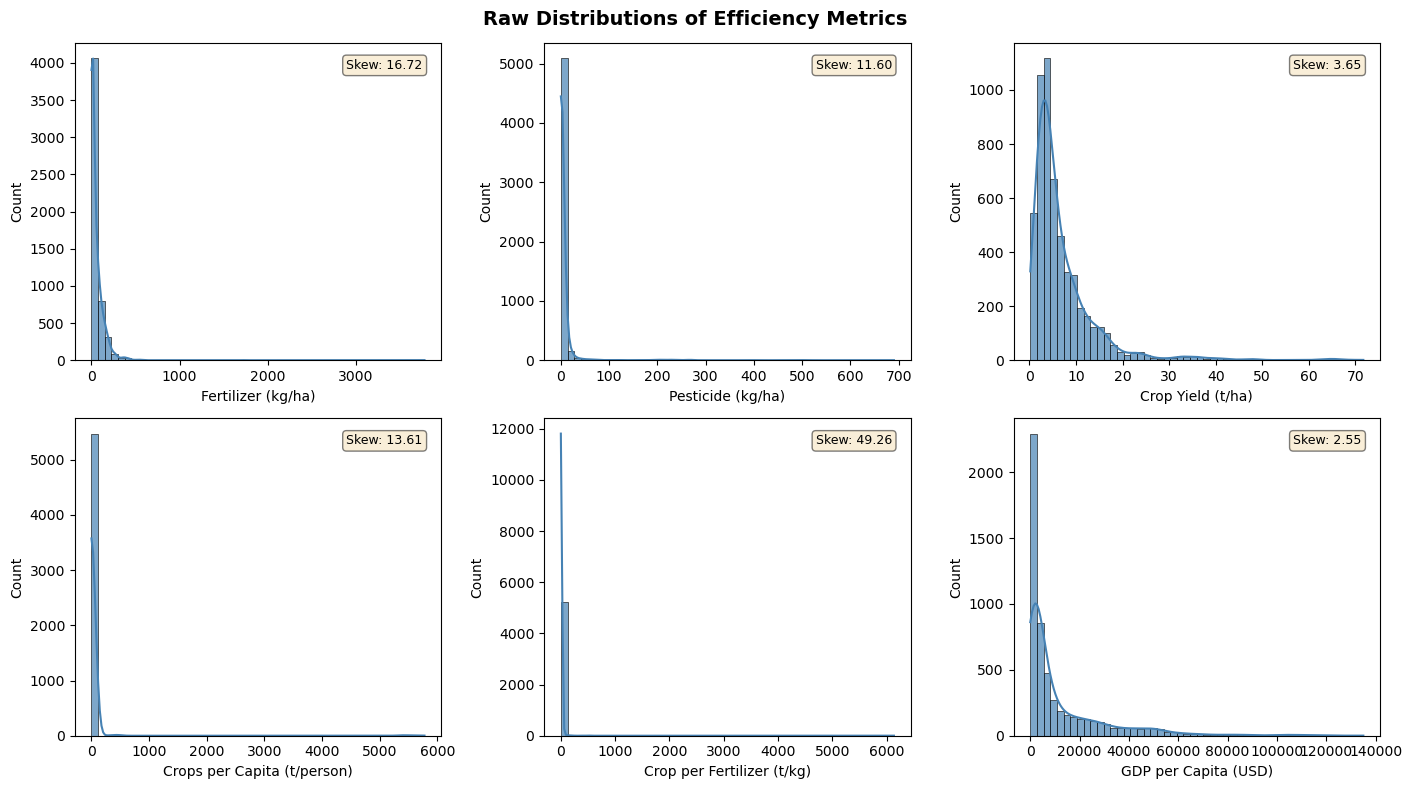

In [21]:
# 3.1 Raw distributions of key intensity metrics
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("Raw Distributions of Efficiency Metrics", fontsize=14, fontweight='bold')

intensity_metrics = [
    ("fert_kg_per_ha", "Fertilizer (kg/ha)"),
    ("pest_kg_per_ha", "Pesticide (kg/ha)"),
    ("crop_t_per_ha", "Crop Yield (t/ha)"),
    ("crop_t_per_capita", "Crops per Capita (t/person)"),
    ("crop_t_per_fert_kg", "Crop per Fertilizer (t/kg)"),
    ("gdp_per_capita", "GDP per Capita (USD)")
]

for ax, (col, label) in zip(axes.flat, intensity_metrics):
    data = master[col].dropna()
    sns.histplot(data, bins=50, kde=True, ax=ax, color='steelblue', alpha=0.7)
    ax.set_xlabel(label)
    ax.set_ylabel("Count")
    
    # Add skewness annotation
    skew = data.skew()
    ax.annotate(f"Skew: {skew:.2f}", xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=9, 
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

## Interpretation

All metrics show strong right-skew (positive skewness).

Most country-years cluster at low values, with a long tail of high-intensity systems.

Log-transformed columns created:
  - log_fert_kg_per_ha
  - log_pest_kg_per_ha
  - log_crop_t_per_ha
  - log_crop_t_per_capita
  - log_gdp_per_capita
  - log_crop_t_per_fert_kg


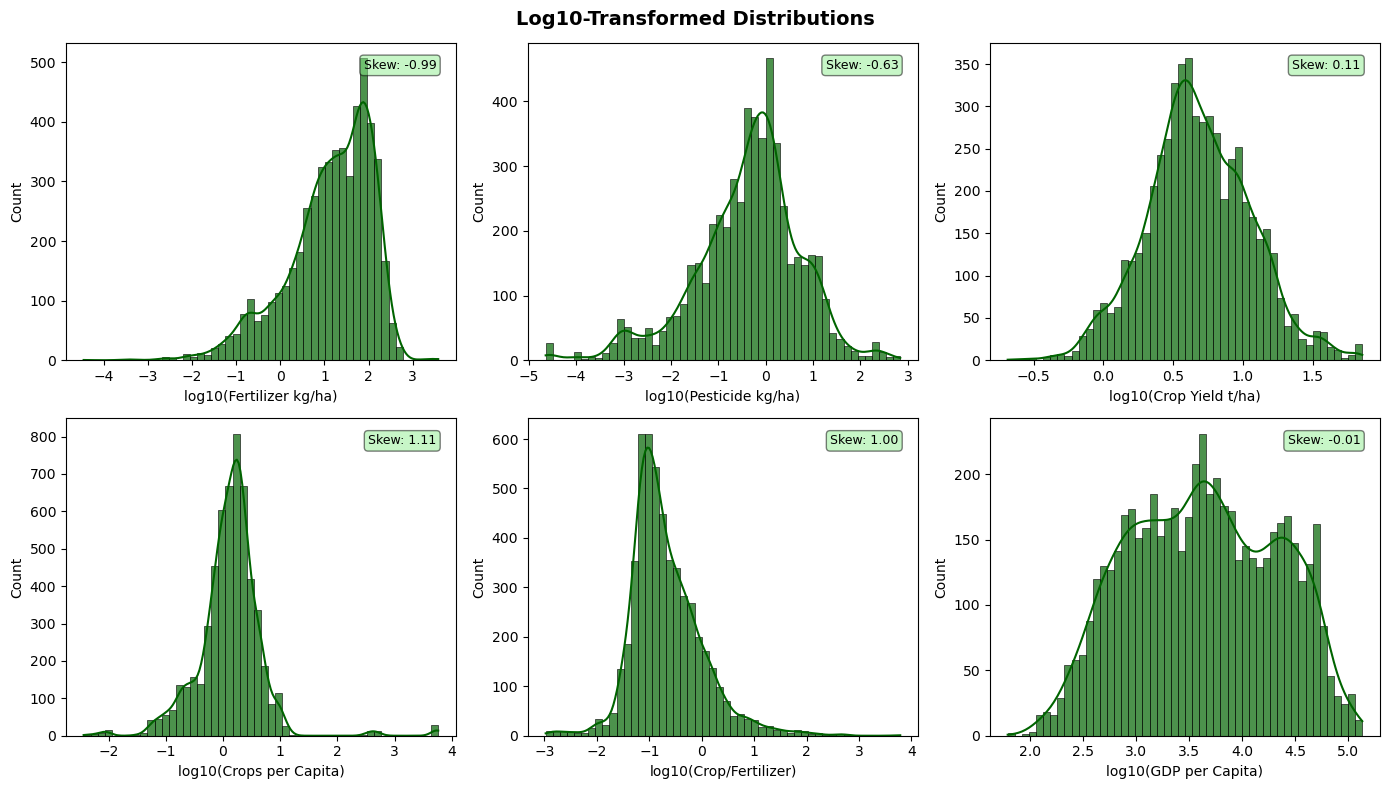

In [22]:
# 3.2 Create log-transformed versions of key metrics
# Using log10 for interpretability

log_metrics = [
    "fert_kg_per_ha", "pest_kg_per_ha", "crop_t_per_ha", 
    "crop_t_per_capita", "gdp_per_capita", "crop_t_per_fert_kg"
]

for col in log_metrics:
    log_col = f"log_{col}"
    # Only take log of positive values
    master[log_col] = np.where(
        master[col] > 0,
        np.log10(master[col]),
        np.nan
    )

print("Log-transformed columns created:")
for col in log_metrics:
    print(f"  - log_{col}")

# 3.3 Log-scale distributions
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
fig.suptitle("Log10-Transformed Distributions", fontsize=14, fontweight='bold')

log_plots = [
    ("log_fert_kg_per_ha", "log10(Fertilizer kg/ha)"),
    ("log_pest_kg_per_ha", "log10(Pesticide kg/ha)"),
    ("log_crop_t_per_ha", "log10(Crop Yield t/ha)"),
    ("log_crop_t_per_capita", "log10(Crops per Capita)"),
    ("log_crop_t_per_fert_kg", "log10(Crop/Fertilizer)"),
    ("log_gdp_per_capita", "log10(GDP per Capita)")
]

for ax, (col, label) in zip(axes.flat, log_plots):
    data = master[col].dropna()
    sns.histplot(data, bins=50, kde=True, ax=ax, color='darkgreen', alpha=0.7)
    ax.set_xlabel(label)
    ax.set_ylabel("Count")
    
    # Add skewness
    skew = data.skew()
    ax.annotate(f"Skew: {skew:.2f}", xy=(0.95, 0.95), xycoords='axes fraction',
                ha='right', va='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()


## INTERPRETATION: 

Log-transformed distributions are much closer to normal.

This suggests log-log regression analysis is justified

# Section 4: Relationship Visualizations

Key questions:
1. Does more fertilizer/pesticide lead to higher yields?
2. Is GDP per capita associated with input intensity or efficiency?
3. Are there diminishing returns to chemical inputs?

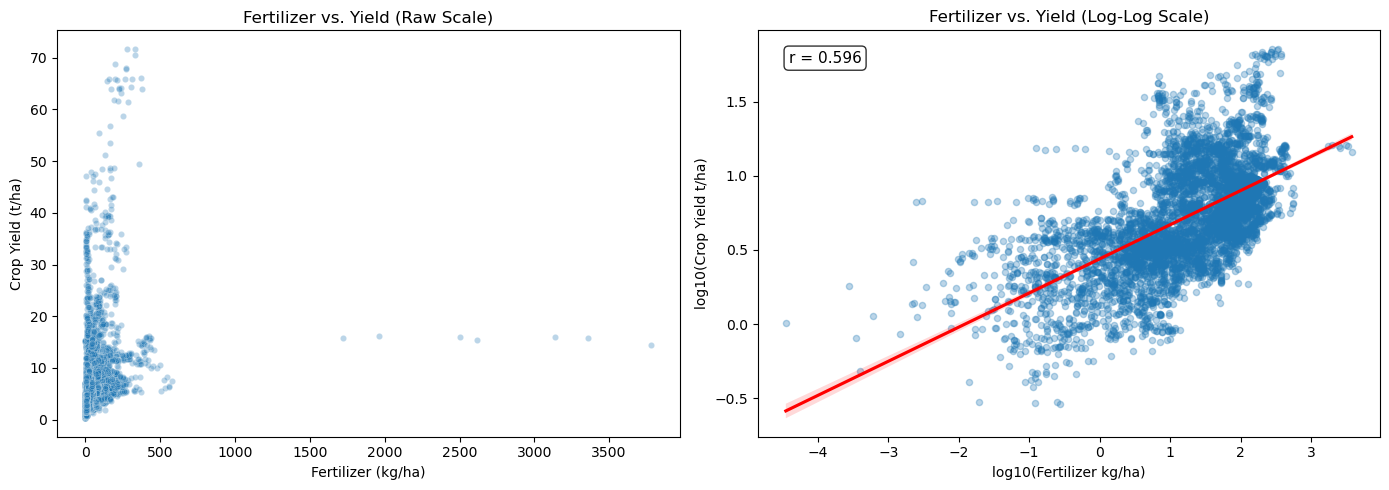

In [23]:
# 4.1 Fertilizer intensity vs. Crop Yield (log-log scale)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw scale
ax1 = axes[0]
sns.scatterplot(
    data=master, x="fert_kg_per_ha", y="crop_t_per_ha",
    alpha=0.3, s=20, ax=ax1
)
ax1.set_xlabel("Fertilizer (kg/ha)")
ax1.set_ylabel("Crop Yield (t/ha)")
ax1.set_title("Fertilizer vs. Yield (Raw Scale)")

# Log-log scale with regression
ax2 = axes[1]
plot_data = master[["log_fert_kg_per_ha", "log_crop_t_per_ha"]].dropna()
sns.regplot(
    data=plot_data, x="log_fert_kg_per_ha", y="log_crop_t_per_ha",
    scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red'},
    ax=ax2
)
ax2.set_xlabel("log10(Fertilizer kg/ha)")
ax2.set_ylabel("log10(Crop Yield t/ha)")
ax2.set_title("Fertilizer vs. Yield (Log-Log Scale)")

# Calculate correlation
corr = plot_data["log_fert_kg_per_ha"].corr(plot_data["log_crop_t_per_ha"])
ax2.annotate(f"r = {corr:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=11, ha='left', va='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## INTERPRETATION: 

Positive correlation between fertilizer use and yield.

Higher fertilizer intensity is associated with higher yields, but with diminishing returns (the relationship flattens at high fertilizer levels in log-log space).

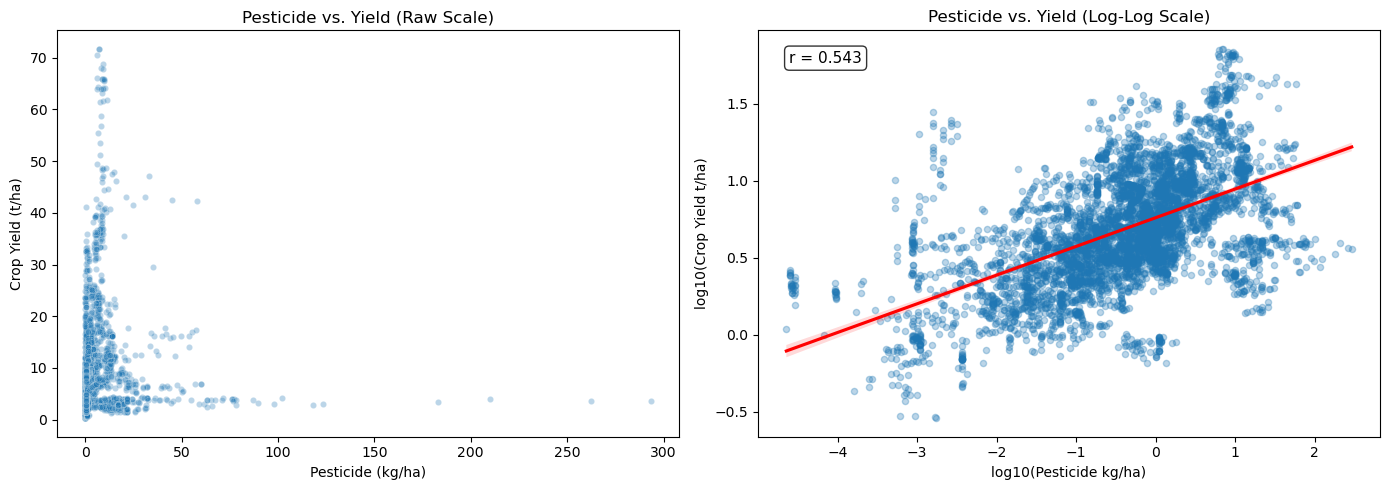

In [24]:
# 4.2 Pesticide intensity vs. Crop Yield
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Raw scale
ax1 = axes[0]
sns.scatterplot(
    data=master, x="pest_kg_per_ha", y="crop_t_per_ha",
    alpha=0.3, s=20, ax=ax1
)
ax1.set_xlabel("Pesticide (kg/ha)")
ax1.set_ylabel("Crop Yield (t/ha)")
ax1.set_title("Pesticide vs. Yield (Raw Scale)")

# Log-log scale with regression
ax2 = axes[1]
plot_data = master[["log_pest_kg_per_ha", "log_crop_t_per_ha"]].dropna()
sns.regplot(
    data=plot_data, x="log_pest_kg_per_ha", y="log_crop_t_per_ha",
    scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red'},
    ax=ax2
)
ax2.set_xlabel("log10(Pesticide kg/ha)")
ax2.set_ylabel("log10(Crop Yield t/ha)")
ax2.set_title("Pesticide vs. Yield (Log-Log Scale)")

corr = plot_data["log_pest_kg_per_ha"].corr(plot_data["log_crop_t_per_ha"])
ax2.annotate(f"r = {corr:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=11, ha='left', va='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## INTERPRETATION: 
Pesticide use also correlates positively with yield, but typically weaker than fertilizer.

Pesticides protect crops rather than directly boosting growth.

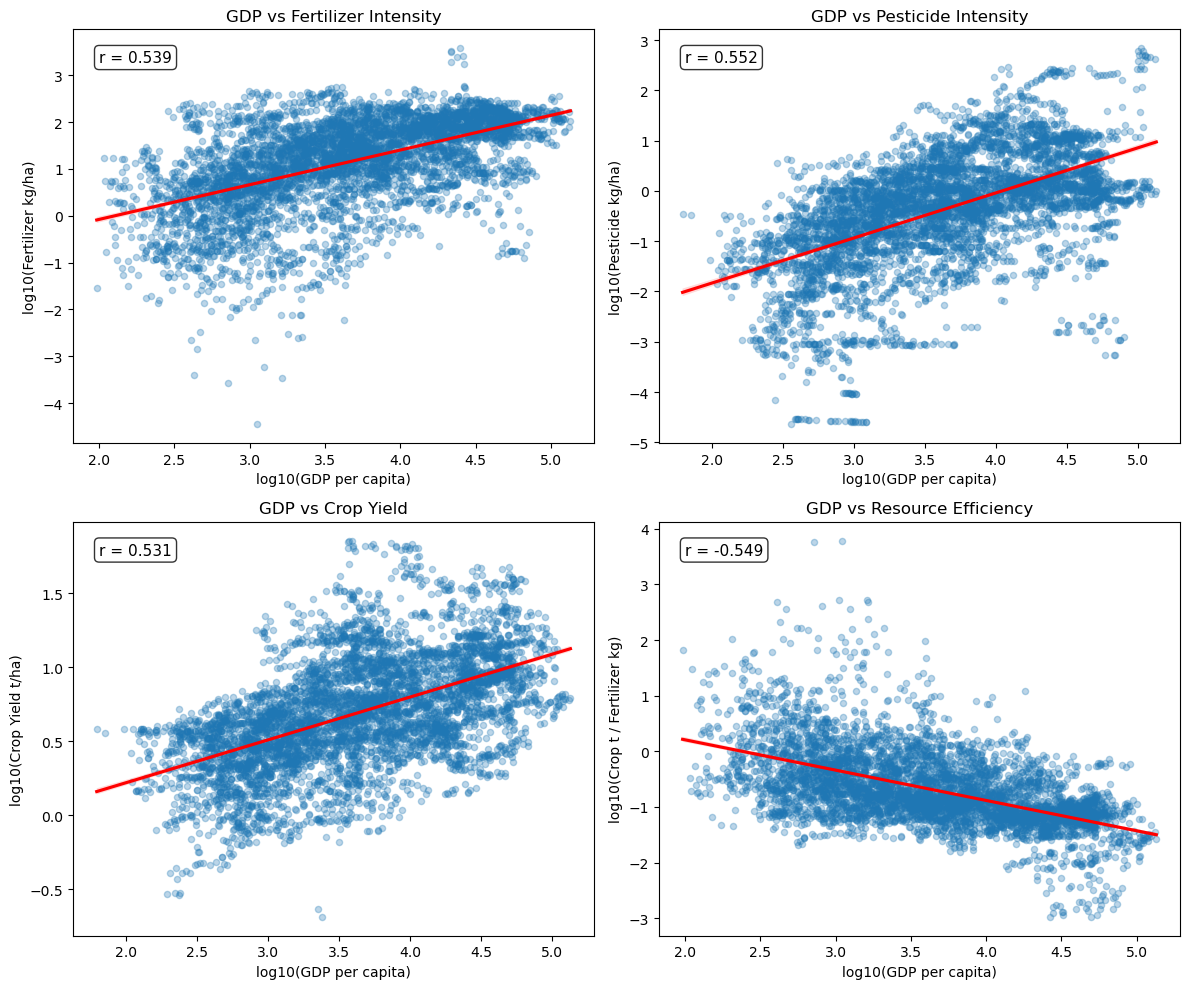

In [25]:
# 4.3 GDP per capita vs. Input Intensity & Efficiency
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GDP vs Fertilizer intensity
ax1 = axes[0, 0]
plot_data = master[["log_gdp_per_capita", "log_fert_kg_per_ha"]].dropna()
sns.regplot(data=plot_data, x="log_gdp_per_capita", y="log_fert_kg_per_ha",
            scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red'}, ax=ax1)
corr1 = plot_data["log_gdp_per_capita"].corr(plot_data["log_fert_kg_per_ha"])
ax1.set_xlabel("log10(GDP per capita)")
ax1.set_ylabel("log10(Fertilizer kg/ha)")
ax1.set_title("GDP vs Fertilizer Intensity")
ax1.annotate(f"r = {corr1:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, ha='left', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# GDP vs Pesticide intensity
ax2 = axes[0, 1]
plot_data = master[["log_gdp_per_capita", "log_pest_kg_per_ha"]].dropna()
sns.regplot(data=plot_data, x="log_gdp_per_capita", y="log_pest_kg_per_ha",
            scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red'}, ax=ax2)
corr2 = plot_data["log_gdp_per_capita"].corr(plot_data["log_pest_kg_per_ha"])
ax2.set_xlabel("log10(GDP per capita)")
ax2.set_ylabel("log10(Pesticide kg/ha)")
ax2.set_title("GDP vs Pesticide Intensity")
ax2.annotate(f"r = {corr2:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, ha='left', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# GDP vs Yield
ax3 = axes[1, 0]
plot_data = master[["log_gdp_per_capita", "log_crop_t_per_ha"]].dropna()
sns.regplot(data=plot_data, x="log_gdp_per_capita", y="log_crop_t_per_ha",
            scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red'}, ax=ax3)
corr3 = plot_data["log_gdp_per_capita"].corr(plot_data["log_crop_t_per_ha"])
ax3.set_xlabel("log10(GDP per capita)")
ax3.set_ylabel("log10(Crop Yield t/ha)")
ax3.set_title("GDP vs Crop Yield")
ax3.annotate(f"r = {corr3:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, ha='left', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# GDP vs Resource efficiency (crop output per fertilizer input)
ax4 = axes[1, 1]
plot_data = master[["log_gdp_per_capita", "log_crop_t_per_fert_kg"]].dropna()
sns.regplot(data=plot_data, x="log_gdp_per_capita", y="log_crop_t_per_fert_kg",
            scatter_kws={'alpha': 0.3, 's': 20}, line_kws={'color': 'red'}, ax=ax4)
corr4 = plot_data["log_gdp_per_capita"].corr(plot_data["log_crop_t_per_fert_kg"])
ax4.set_xlabel("log10(GDP per capita)")
ax4.set_ylabel("log10(Crop t / Fertilizer kg)")
ax4.set_title("GDP vs Resource Efficiency")
ax4.annotate(f"r = {corr4:.3f}", xy=(0.05, 0.95), xycoords='axes fraction',
            fontsize=11, ha='left', va='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

## INTERPRETATION:
Wealthier countries use MORE fertilizer (r=0.539) and pesticides (r=0.552)

Wealthier countries achieve HIGHER yields (r=0.531)

But resource efficiency (output/input) shows weaker/negative correlation (r=-0.549)
  suggesting diminishing returns - rich countries use more inputs but not proportionally more output.

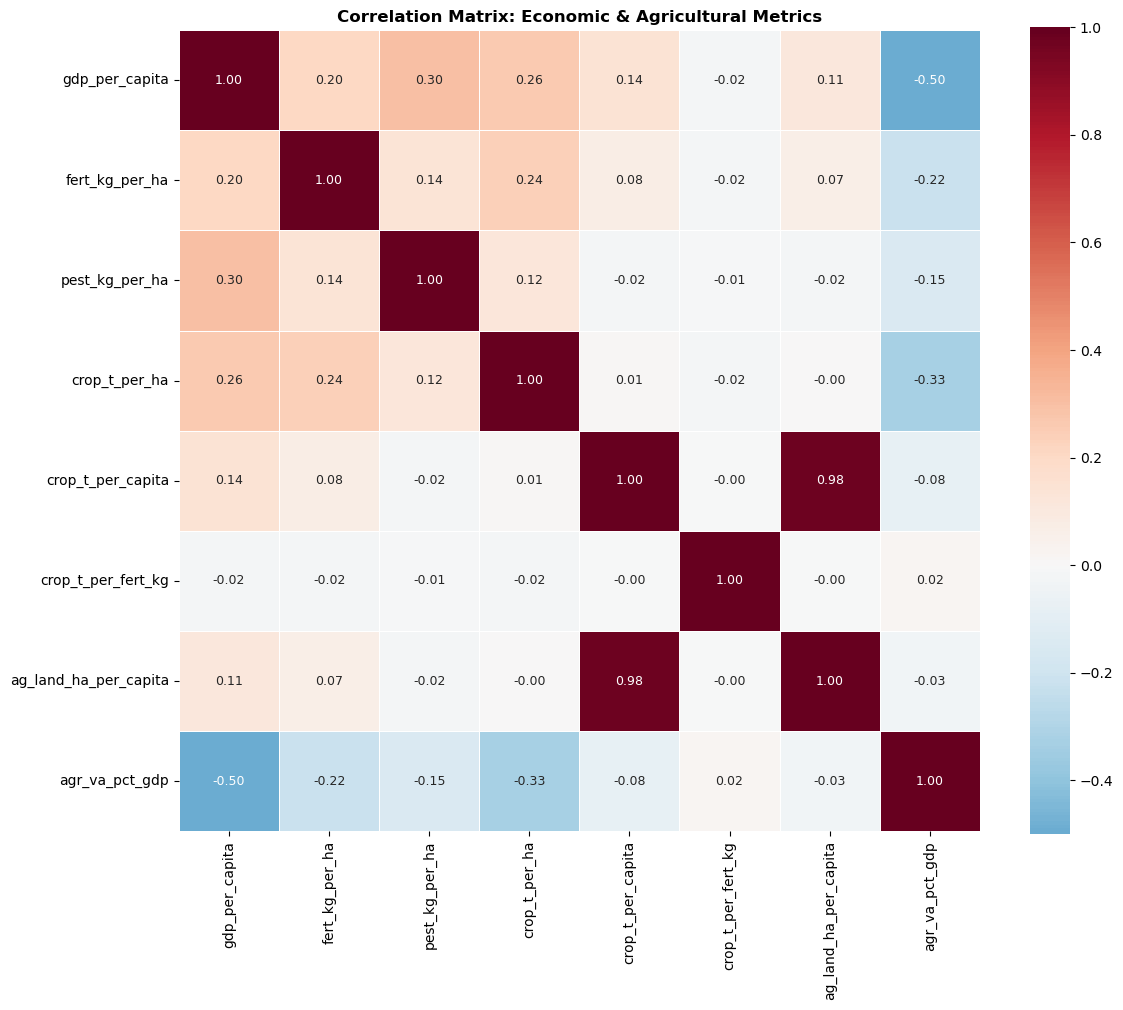

In [26]:
# 4.4 Correlation heatmap of all key metrics
fig, ax = plt.subplots(figsize=(12, 10))

corr_cols = [
    "gdp_per_capita", "fert_kg_per_ha", "pest_kg_per_ha",
    "crop_t_per_ha", "crop_t_per_capita", "crop_t_per_fert_kg",
    "ag_land_ha_per_capita", "agr_va_pct_gdp"
]

corr_matrix = master[corr_cols].corr()

sns.heatmap(
    corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0,
    square=True, linewidths=0.5, ax=ax,
    annot_kws={"size": 9}
)
ax.set_title("Correlation Matrix: Economic & Agricultural Metrics", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

## KEY CORRELATIONS:
GDP & Fertilizer intensity: positive (richer = more chemical inputs)

Fertilizer & Yield: positive (more inputs = more output)

Crop/Fertilizer efficiency & GDP: typically negative (diminishing returns in rich countries)

Ag value % GDP & GDP: negative (agriculture shrinks as % of economy with development)

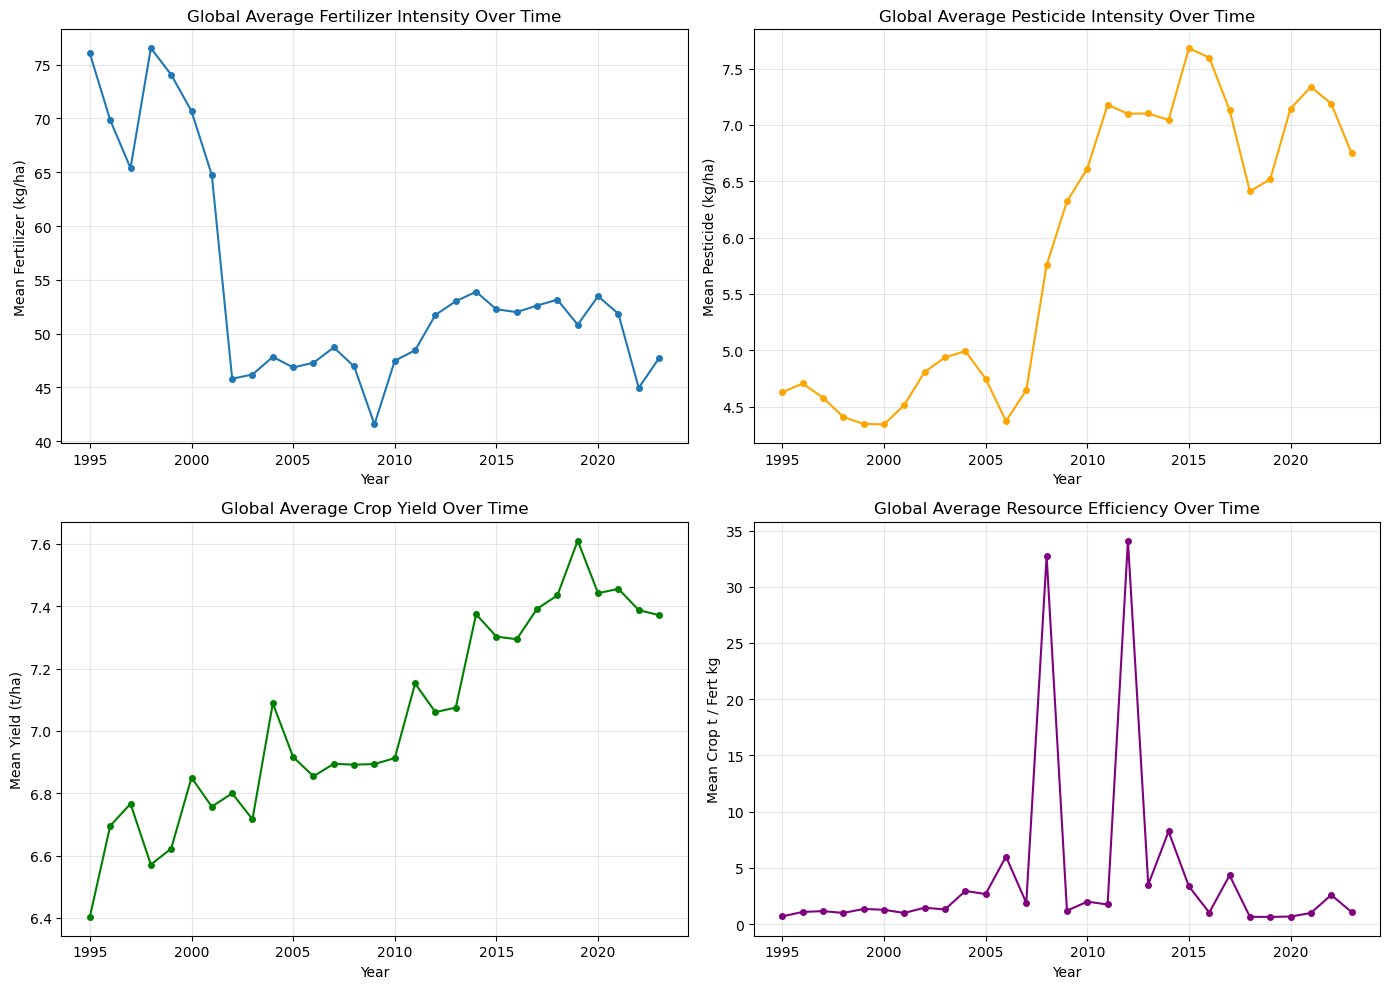

In [27]:
# 4.5 Trends over time: Global averages by year
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Create decade column for grouping
master["Decade"] = (master["Year"] // 10) * 10

yearly_means = master.groupby("Year").agg({
    "fert_kg_per_ha": "mean",
    "pest_kg_per_ha": "mean",
    "crop_t_per_ha": "mean",
    "crop_t_per_fert_kg": "mean"
}).reset_index()

# Plot 1: Fertilizer intensity over time
ax1 = axes[0, 0]
ax1.plot(yearly_means["Year"], yearly_means["fert_kg_per_ha"], marker='o', markersize=4)
ax1.set_xlabel("Year")
ax1.set_ylabel("Mean Fertilizer (kg/ha)")
ax1.set_title("Global Average Fertilizer Intensity Over Time")
ax1.grid(True, alpha=0.3)

# Plot 2: Pesticide intensity over time
ax2 = axes[0, 1]
ax2.plot(yearly_means["Year"], yearly_means["pest_kg_per_ha"], marker='o', markersize=4, color='orange')
ax2.set_xlabel("Year")
ax2.set_ylabel("Mean Pesticide (kg/ha)")
ax2.set_title("Global Average Pesticide Intensity Over Time")
ax2.grid(True, alpha=0.3)

# Plot 3: Yield over time
ax3 = axes[1, 0]
ax3.plot(yearly_means["Year"], yearly_means["crop_t_per_ha"], marker='o', markersize=4, color='green')
ax3.set_xlabel("Year")
ax3.set_ylabel("Mean Yield (t/ha)")
ax3.set_title("Global Average Crop Yield Over Time")
ax3.grid(True, alpha=0.3)

# Plot 4: Resource efficiency over time
ax4 = axes[1, 1]
ax4.plot(yearly_means["Year"], yearly_means["crop_t_per_fert_kg"], marker='o', markersize=4, color='purple')
ax4.set_xlabel("Year")
ax4.set_ylabel("Mean Crop t / Fert kg")
ax4.set_title("Global Average Resource Efficiency Over Time")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## INTERPRETATION:
Fertilizer use has generally increased globally over time

Yields have also increased, suggesting technological progress

Resource efficiency trends show whether we're getting better or worse at converting inputs to outputs. It has increased minimally over the years, with two noticeable outliers

## INVESTIGATION: What's causing the spikes in resource efficiency around 2010?

In [56]:
# Look at the yearly data closer
yearly_stats = master.groupby("Year").agg({
    "crop_t_per_fert_kg": ["mean", "median", "std", "count", "max"]
}).round(2)
yearly_stats.columns = ["Mean", "Median", "Std", "Count", "Max"]

print("Resource Efficiency (crop_t_per_fert_kg) by Year:")
print(yearly_stats.loc[2005:2015])

# Compare mean vs median - if they differ greatly, outliers are pulling the mean
print("\n" + "="*60)
print("Mean vs Median comparison (large difference = outlier effect):")
print("="*60)
yearly_stats["Mean/Median Ratio"] = (yearly_stats["Mean"] / yearly_stats["Median"]).round(2)
print(yearly_stats.loc[2005:2015][["Mean", "Median", "Mean/Median Ratio", "Max"]])

Resource Efficiency (crop_t_per_fert_kg) by Year:
       Mean  Median     Std  Count      Max
Year                                       
2005   2.67    0.19   14.12    182   130.71
2006   6.01    0.17   36.17    184   416.28
2007   1.89    0.16   11.93    183   157.34
2008  32.72    0.17  427.94    183  5789.98
2009   1.19    0.19    4.95    186    60.69
2010   2.00    0.17   12.82    185   168.25
2011   1.74    0.15   11.49    185   149.17
2012  34.10    0.16  446.24    189  6135.04
2013   3.52    0.16   35.37    188   481.38
2014   8.24    0.16   59.04    188   535.15
2015   3.36    0.16   20.58    188   237.66

Mean vs Median comparison (large difference = outlier effect):
       Mean  Median  Mean/Median Ratio      Max
Year                                           
2005   2.67    0.19              14.05   130.71
2006   6.01    0.17              35.35   416.28
2007   1.89    0.16              11.81   157.34
2008  32.72    0.17             192.47  5789.98
2009   1.19    0.19       

In [57]:
# Which countries have extreme resource efficiency values in those spike years?
spike_years = [2008, 2009, 2010, 2011, 2012]

print("="*80)
print("TOP 5 COUNTRIES BY RESOURCE EFFICIENCY IN EACH SPIKE YEAR")
print("="*80)

for year in spike_years:
    year_data = master[master["Year"] == year].nlargest(5, "crop_t_per_fert_kg")[
        ["Area", "Year", "crop_t_per_fert_kg", "fert_total_tonnes", "total_crop_production_t"]
    ]
    print(f"\n{year}:")
    print(year_data.to_string(index=False))

# Check if specific countries have data anomalies
print("\n" + "="*80)
print("COUNTRIES WITH EXTREMELY HIGH EFFICIENCY (crop_t_per_fert_kg > 1)")
print("="*80)
extreme = master[master["crop_t_per_fert_kg"] > 1][
    ["Area", "Year", "crop_t_per_fert_kg", "fert_total_tonnes", "total_crop_production_t"]
].sort_values("crop_t_per_fert_kg", ascending=False)
print(f"Number of extreme observations: {len(extreme)}")
print(extreme.head(20).to_string(index=False))

TOP 5 COUNTRIES BY RESOURCE EFFICIENCY IN EACH SPIKE YEAR

2008:
        Area  Year  crop_t_per_fert_kg  fert_total_tonnes  total_crop_production_t
        Togo  2008         5789.975390                1.0               5789975.39
       Benin  2008           21.283858              801.0              17048370.38
     Comoros  2008           18.911700               26.0                491704.21
Sierra Leone  2008           12.543421              602.0               7551139.74
       Congo  2008           12.472111              366.0               4564792.51

2009:
                    Area  Year  crop_t_per_fert_kg  fert_total_tonnes  total_crop_production_t
         Solomon Islands  2009           60.690573               19.0               1153120.89
                 Comoros  2009           21.270910               24.0                510501.83
                  Rwanda  2009           11.093769             1444.0              16019402.92
                   Samoa  2009           10.311076

## ROOT CAUSE: The issue is using MEAN with highly skewed data
A few countries with very low fertilizer use but decent crop production create extreme efficiency values that spike the mean

## POSSIBLE SOLUTION: Use MEDIAN for time series (robust to outliers)

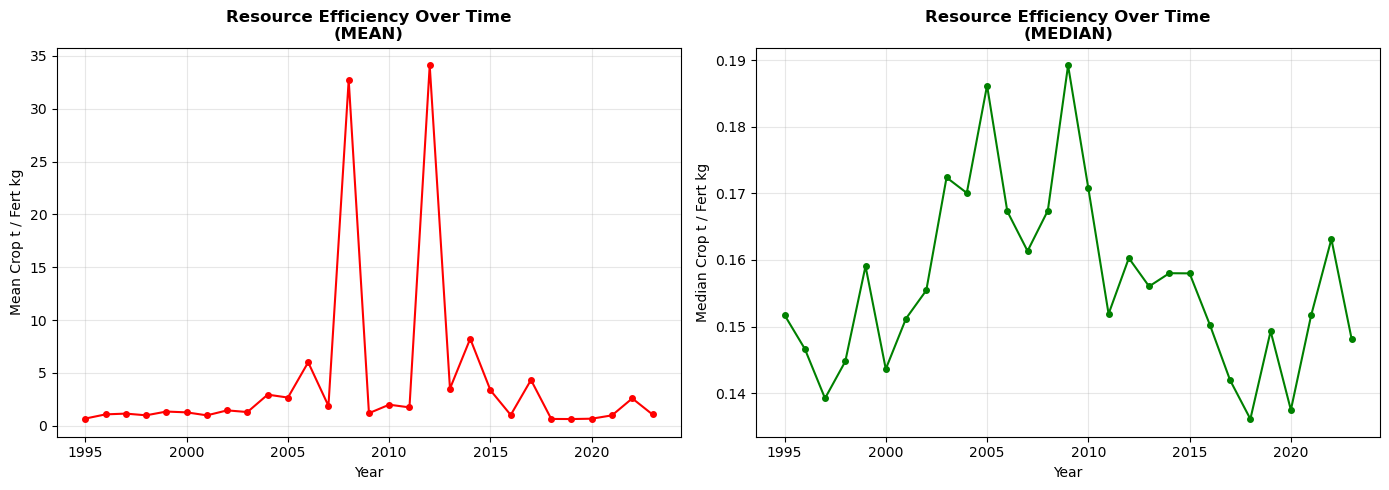

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original (mean)
ax1 = axes[0]
yearly_means = master.groupby("Year")["crop_t_per_fert_kg"].mean()
ax1.plot(yearly_means.index, yearly_means.values, marker='o', markersize=4, color='red')
ax1.set_xlabel("Year")
ax1.set_ylabel("Mean Crop t / Fert kg")
ax1.set_title("Resource Efficiency Over Time\n(MEAN)", fontweight='bold')
ax1.grid(True, alpha=0.3)

# New Approach (median)
ax2 = axes[1]
yearly_medians = master.groupby("Year")["crop_t_per_fert_kg"].median()
ax2.plot(yearly_medians.index, yearly_medians.values, marker='o', markersize=4, color='green')
ax2.set_xlabel("Year")
ax2.set_ylabel("Median Crop t / Fert kg")
ax2.set_title("Resource Efficiency Over Time\n(MEDIAN)", fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The spikes are caused by a few countries with very low fertilizer use but
substantial crop production (likely subsistence farming or reporting gaps).
These create extreme efficiency ratios that spike the mean.

The median (green plot) shows a different trend: relatively stable efficiency
with perhaps a slight decline over time as more countries intensify inputs.

However, using the median brings the scale of the Median Crop t / Fert kg WAY down, which shows a less accurate picture of the data.

I want to try an altnative approach where the mean is still used, but outliers are excluded

In [61]:
# ALTERNATIVE APPROACH: Mean with outliers excluded
# IQR method to identify and exclude outliers

def mean_without_outliers(series, method='iqr', threshold=1.5):
    """
    Calculate mean after excluding outliers.
    
    Methods:
    - 'iqr': Exclude values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR
    - 'percentile': Exclude values outside specified percentiles
    """
    s = series.dropna()
    
    if method == 'iqr':
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        filtered = s[(s >= lower_bound) & (s <= upper_bound)]
    elif method == 'percentile':
        lower_bound = s.quantile(0.01)  # 1st percentile
        upper_bound = s.quantile(0.99)  # 99th percentile
        filtered = s[(s >= lower_bound) & (s <= upper_bound)]
    
    return filtered.mean()

# Calculate mean excluding outliers for each year
yearly_mean_no_outliers_iqr = master.groupby("Year")["crop_t_per_fert_kg"].apply(
    lambda x: mean_without_outliers(x, method='iqr', threshold=1.5)
)

yearly_mean_no_outliers_pct = master.groupby("Year")["crop_t_per_fert_kg"].apply(
    lambda x: mean_without_outliers(x, method='percentile')
)

print("Comparison of aggregation methods (sample years around spike):")
print("="*70)
comparison = pd.DataFrame({
    "Raw Mean": master.groupby("Year")["crop_t_per_fert_kg"].mean(),
    "Median": master.groupby("Year")["crop_t_per_fert_kg"].median(),
    "Mean (IQR filtered)": yearly_mean_no_outliers_iqr,
    "Mean (1-99 pctl)": yearly_mean_no_outliers_pct
}).loc[2005:2015].round(4)
print(comparison)

Comparison of aggregation methods (sample years around spike):
      Raw Mean  Median  Mean (IQR filtered)  Mean (1-99 pctl)
Year                                                         
2005    2.6717  0.1862               0.2924            1.4153
2006    6.0092  0.1673               0.2621            2.9053
2007    1.8868  0.1613               0.2499            0.9117
2008   32.7248  0.1674               0.3192            0.9910
2009    1.1932  0.1892               0.3004            0.7691
2010    1.9975  0.1708               0.2535            0.9308
2011    1.7432  0.1519               0.2243            0.7477
2012   34.0984  0.1603               0.2308            1.1614
2013    3.5191  0.1560               0.2198            0.6516
2014    8.2384  0.1580               0.2444            2.8288
2015    3.3559  0.1580               0.2214            1.5105


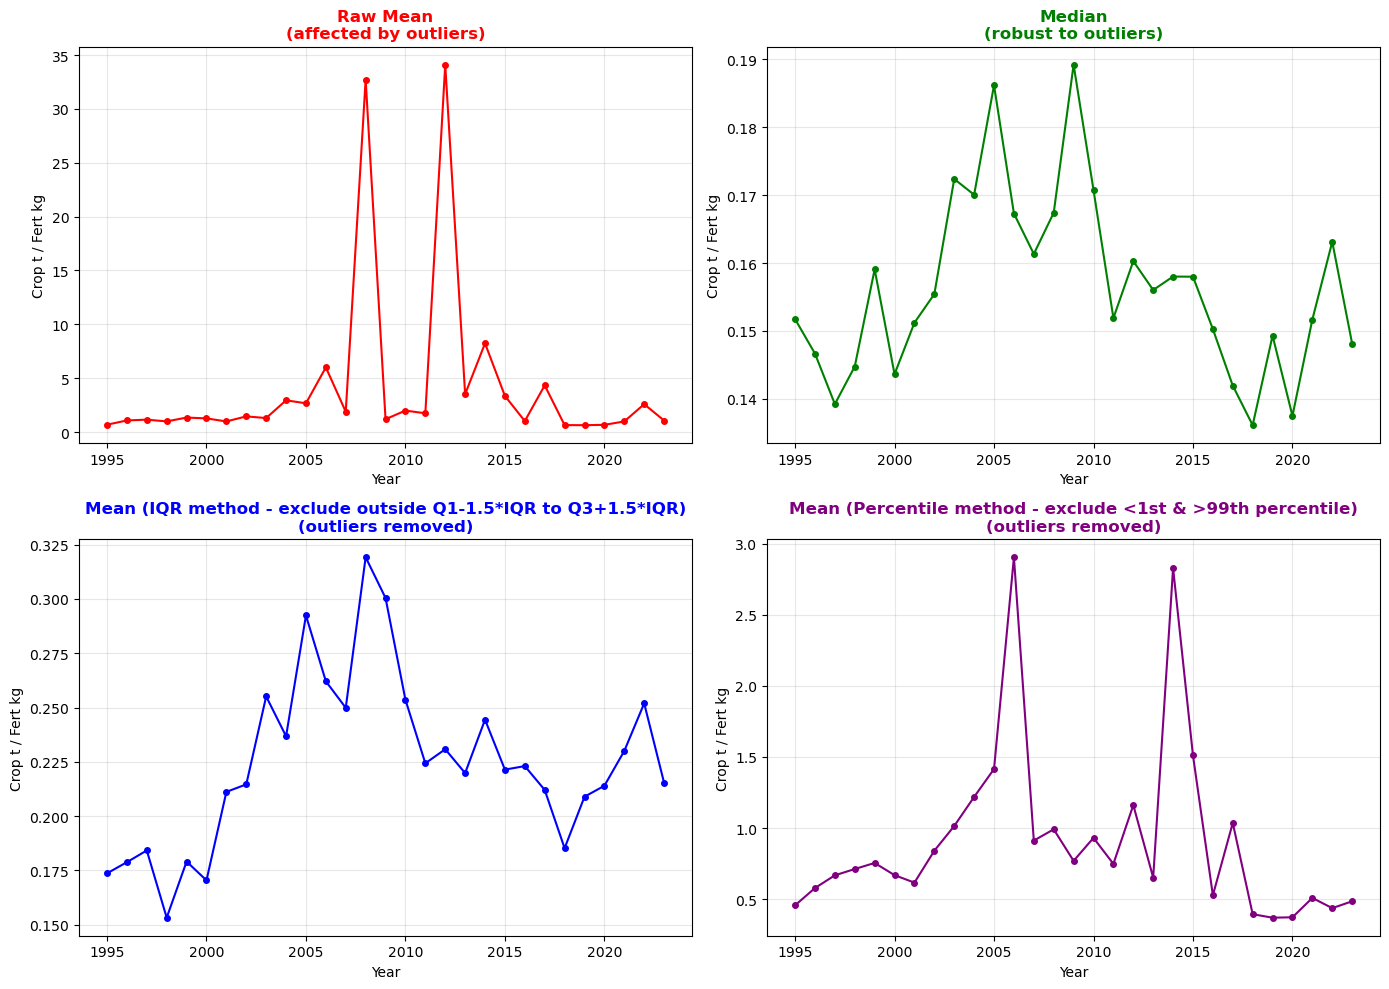


INTERPRETATION:
- Raw Mean (red): Shows dramatic spikes due to extreme outliers
- Median (green): Completely robust, shows stable trend
- IQR-filtered Mean (blue): Removes outliers using interquartile range method
- Percentile-filtered Mean (purple): Removes top/bottom 1% of values

Both outlier-exclusion methods for the mean produce smooth trends similar to the median,


In [62]:
# Visualize all methods side by side
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Raw mean (original - with spikes)
ax1 = axes[0, 0]
yearly_raw_mean = master.groupby("Year")["crop_t_per_fert_kg"].mean()
ax1.plot(yearly_raw_mean.index, yearly_raw_mean.values, marker='o', markersize=4, color='red')
ax1.set_xlabel("Year")
ax1.set_ylabel("Crop t / Fert kg")
ax1.set_title("Raw Mean\n(affected by outliers)", fontweight='bold', color='red')
ax1.grid(True, alpha=0.3)

# 2. Median (significantly decreases the y-axis)
ax2 = axes[0, 1]
yearly_median = master.groupby("Year")["crop_t_per_fert_kg"].median()
ax2.plot(yearly_median.index, yearly_median.values, marker='o', markersize=4, color='green')
ax2.set_xlabel("Year")
ax2.set_ylabel("Crop t / Fert kg")
ax2.set_title("Median\n(robust to outliers)", fontweight='bold', color='green')
ax2.grid(True, alpha=0.3)

# 3. Mean with IQR outlier exclusion
ax3 = axes[1, 0]
ax3.plot(yearly_mean_no_outliers_iqr.index, yearly_mean_no_outliers_iqr.values, 
         marker='o', markersize=4, color='blue')
ax3.set_xlabel("Year")
ax3.set_ylabel("Crop t / Fert kg")
ax3.set_title("Mean (IQR method - exclude outside Q1-1.5*IQR to Q3+1.5*IQR)\n(outliers removed)", 
              fontweight='bold', color='blue')
ax3.grid(True, alpha=0.3)

# 4. Mean with percentile exclusion
ax4 = axes[1, 1]
ax4.plot(yearly_mean_no_outliers_pct.index, yearly_mean_no_outliers_pct.values, 
         marker='o', markersize=4, color='purple')
ax4.set_xlabel("Year")
ax4.set_ylabel("Crop t / Fert kg")
ax4.set_title("Mean (Percentile method - exclude <1st & >99th percentile)\n(outliers removed)", 
              fontweight='bold', color='purple')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETATION:")
print("- Raw Mean (red): Shows dramatic spikes due to extreme outliers")
print("- Median (green): Completely robust, shows stable trend")
print("- IQR-filtered Mean (blue): Removes outliers using interquartile range method")
print("- Percentile-filtered Mean (purple): Removes top/bottom 1% of values")
print("\nBoth outlier-exclusion methods for the mean produce smooth trends similar to the median,")

## INTERPRETATION:
Raw Mean (red): Shows dramatic spikes due to extreme outliers

Median (green): Completely robust, shows stable trend

IQR-filtered Mean (blue): Removes outliers using interquartile range method

Percentile-filtered Mean (purple): Removes top/bottom 1% of values

IQR method for the mean ends up producing smooth trends similar to the median

Percentile-filtered mean ends up including those same spikes as our original mean

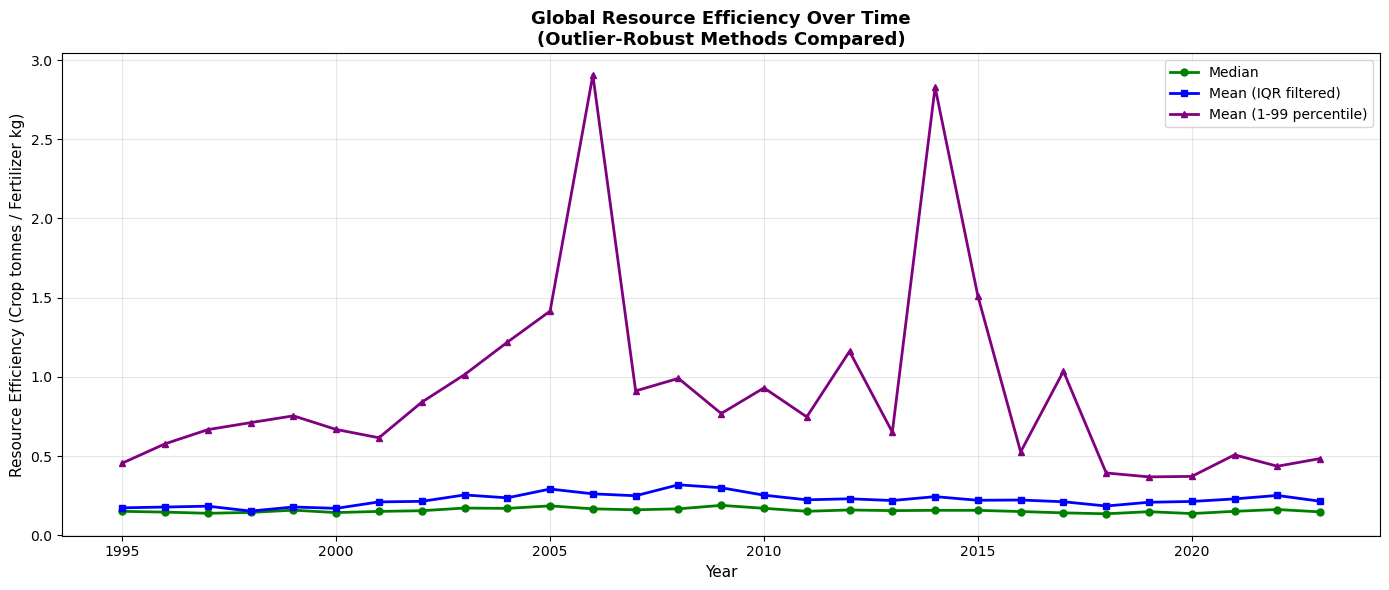


Number of outliers removed per year (IQR method):
Year
2005    25
2006    26
2007    27
2008    21
2009    22
2010    23
2011    26
2012    22
2013    25
2014    19
2015    26


In [63]:
# Overlay plot: Compare all methods on same axes (excluding raw mean for scale)
fig, ax = plt.subplots(figsize=(14, 6))

ax.plot(yearly_median.index, yearly_median.values, 
        marker='o', markersize=5, color='green', linewidth=2, label='Median')
ax.plot(yearly_mean_no_outliers_iqr.index, yearly_mean_no_outliers_iqr.values, 
        marker='s', markersize=5, color='blue', linewidth=2, label='Mean (IQR filtered)')
ax.plot(yearly_mean_no_outliers_pct.index, yearly_mean_no_outliers_pct.values, 
        marker='^', markersize=5, color='purple', linewidth=2, label='Mean (1-99 percentile)')

ax.set_xlabel("Year", fontsize=11)
ax.set_ylabel("Resource Efficiency (Crop tonnes / Fertilizer kg)", fontsize=11)
ax.set_title("Global Resource Efficiency Over Time\n(Outlier-Robust Methods Compared)", 
             fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show how many outliers were removed each year
print("\nNumber of outliers removed per year (IQR method):")
print("="*60)

def count_outliers(series):
    s = series.dropna()
    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = s[(s < lower_bound) | (s > upper_bound)]
    return len(outliers)

outlier_counts = master.groupby("Year")["crop_t_per_fert_kg"].apply(count_outliers)
print(outlier_counts.loc[2005:2015].to_string())

# 5. Identifying Efficient vs. Inefficient Production Systems

We define efficiency based on the relationship between inputs and outputs:
- Efficient: High yield with below-median chemical input intensity
- Inefficient: Low yield despite above-median chemical input intensity

This helps identify countries that achieve more with less, vs. those that use many resources without proportional gains.

In [68]:
# 5.1 Classify country-years into efficiency quadrants
# Using median as threshold now instead of mean, which caused problems when calculating global resource efficiency over time

# Filter to rows with complete data for classification
classify_cols = ["fert_kg_per_ha", "crop_t_per_ha"]
df_classify = master.dropna(subset=classify_cols).copy()

# Calculate medians
median_fert = df_classify["fert_kg_per_ha"].median()
median_yield = df_classify["crop_t_per_ha"].median()

print(f"Median fertilizer intensity: {median_fert:.2f} kg/ha")
print(f"Median crop yield: {median_yield:.2f} t/ha")

# Classify into quadrants
def classify_efficiency(row):
    high_yield = row["crop_t_per_ha"] >= median_yield
    high_input = row["fert_kg_per_ha"] >= median_fert
    
    if high_yield and not high_input:
        return "Efficient (High yield, Low input)"
    elif high_yield and high_input:
        return "High-Input High-Output"
    elif not high_yield and not high_input:
        return "Low-Input Low-Output"
    else:  # low yield, high input
        return "Inefficient (Low yield, High input)"

df_classify["efficiency_class"] = df_classify.apply(classify_efficiency, axis=1)

# Count by class
print("\n" + "="*60)
print("EFFICIENCY CLASSIFICATION COUNTS")
print("="*60)
class_counts = df_classify["efficiency_class"].value_counts()
print(class_counts)
print(f"\nTotal classified observations: {len(df_classify)}")

Median fertilizer intensity: 20.00 kg/ha
Median crop yield: 4.79 t/ha

EFFICIENCY CLASSIFICATION COUNTS
efficiency_class
Low-Input Low-Output                   1986
High-Input High-Output                 1986
Inefficient (Low yield, High input)     646
Efficient (High yield, Low input)       646
Name: count, dtype: int64

Total classified observations: 5264


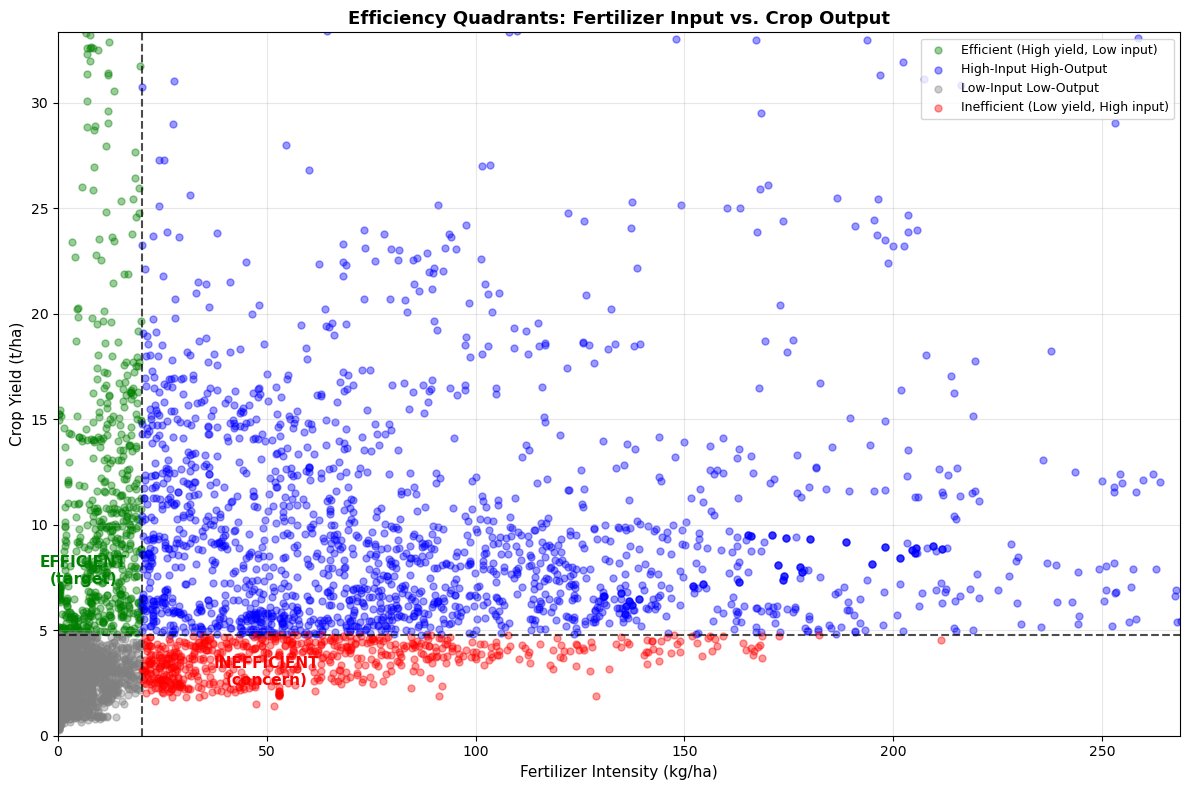

In [69]:
# 5.2 Visualize efficiency quadrants
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each class
colors = {
    "Efficient (High yield, Low input)": "green",
    "High-Input High-Output": "blue",
    "Low-Input Low-Output": "gray",
    "Inefficient (Low yield, High input)": "red"
}

for label, color in colors.items():
    subset = df_classify[df_classify["efficiency_class"] == label]
    ax.scatter(
        subset["fert_kg_per_ha"], subset["crop_t_per_ha"],
        c=color, label=label, alpha=0.4, s=25
    )

# Add median lines
ax.axvline(median_fert, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
ax.axhline(median_yield, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Annotate quadrants
ax.text(median_fert * 0.3, median_yield * 1.5, "EFFICIENT\n(target)", fontsize=11, 
        color='green', fontweight='bold', ha='center')
ax.text(median_fert * 2.5, median_yield * 0.5, "INEFFICIENT\n(concern)", fontsize=11, 
        color='red', fontweight='bold', ha='center')

ax.set_xlabel("Fertilizer Intensity (kg/ha)", fontsize=11)
ax.set_ylabel("Crop Yield (t/ha)", fontsize=11)
ax.set_title("Efficiency Quadrants: Fertilizer Input vs. Crop Output", fontsize=13, fontweight='bold')
ax.legend(loc='upper right', fontsize=9)
ax.set_xlim(0, df_classify["fert_kg_per_ha"].quantile(0.98))
ax.set_ylim(0, df_classify["crop_t_per_ha"].quantile(0.98))
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## INTERPRETATION:
GREEN (Efficient): These country-years achieve above-median yields with below-median inputs

RED (Inefficient): These use above-median inputs but achieve below-median yields

BLUE: High-input, high-output systems (intensive but productive)

GRAY: Low-input, low-output systems (often subsistence agriculture)

In [27]:
# 5.3 Summary tables: Top/Bottom countries by efficiency (averaged over time)

# Aggregate by country (mean across all years)
country_avg = df_classify.groupby("Area").agg({
    "fert_kg_per_ha": "mean",
    "pest_kg_per_ha": "mean",
    "crop_t_per_ha": "mean",
    "crop_t_per_fert_kg": "mean",
    "gdp_per_capita": "mean",
    "efficiency_class": lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else "Mixed"
}).reset_index()

country_avg.columns = ["Country", "Avg Fert kg/ha", "Avg Pest kg/ha", 
                       "Avg Yield t/ha", "Avg Crop/Fert", "Avg GDP/cap", "Most Common Class"]

# Top 10 EFFICIENT countries (high yield relative to fertilizer input)
print("="*80)
print("TOP 10 MOST EFFICIENT COUNTRIES (Highest crop output per kg fertilizer)")
print("="*80)
top_efficient = country_avg.nlargest(10, "Avg Crop/Fert")[
    ["Country", "Avg Yield t/ha", "Avg Fert kg/ha", "Avg Crop/Fert", "Avg GDP/cap"]
].round(2)
print(top_efficient.to_string(index=False))

TOP 10 MOST EFFICIENT COUNTRIES (Highest crop output per kg fertilizer)
                         Country  Avg Yield t/ha  Avg Fert kg/ha  Avg Crop/Fert  Avg GDP/cap
                     South Sudan            1.31            0.01         622.77      1270.58
                            Togo            1.64            4.48         213.48       666.62
                        Kiribati            2.98            0.38          56.25      1592.95
        Central African Republic            2.06            0.07          46.26       379.07
                         Comoros            2.30            1.01          41.53      1223.36
                           Benin            2.65           10.34          40.68       879.42
                          Rwanda            4.03            5.77          19.96       542.60
Democratic Republic of the Congo            3.98            0.40          18.02       347.60
                           Samoa            2.98            0.69          17.46      3475.7

In [28]:
# Top 10 LEAST EFFICIENT countries (lowest crop output per kg fertilizer)
print("\n" + "="*80)
print("TOP 10 LEAST EFFICIENT COUNTRIES (Lowest crop output per kg fertilizer)")
print("="*80)
least_efficient = country_avg.nsmallest(10, "Avg Crop/Fert")[
    ["Country", "Avg Yield t/ha", "Avg Fert kg/ha", "Avg Crop/Fert", "Avg GDP/cap"]
].round(2)
print(least_efficient.to_string(index=False))

print("\n" + "="*80)
print("COUNTRIES MOST OFTEN IN 'EFFICIENT' QUADRANT")
print("="*80)
efficient_countries = country_avg[
    country_avg["Most Common Class"] == "Efficient (High yield, Low input)"
].sort_values("Avg Crop/Fert", ascending=False).head(10)
print(efficient_countries[["Country", "Avg Yield t/ha", "Avg Fert kg/ha", "Avg Crop/Fert"]].round(2).to_string(index=False))

print("\n" + "="*80)
print("COUNTRIES MOST OFTEN IN 'INEFFICIENT' QUADRANT")
print("="*80)
inefficient_countries = country_avg[
    country_avg["Most Common Class"] == "Inefficient (Low yield, High input)"
].sort_values("Avg Crop/Fert", ascending=True).head(10)
if len(inefficient_countries) > 0:
    print(inefficient_countries[["Country", "Avg Yield t/ha", "Avg Fert kg/ha", "Avg Crop/Fert"]].round(2).to_string(index=False))
else:
    print("No countries consistently classified as inefficient.")


TOP 10 LEAST EFFICIENT COUNTRIES (Lowest crop output per kg fertilizer)
      Country  Avg Yield t/ha  Avg Fert kg/ha  Avg Crop/Fert  Avg GDP/cap
      Iceland           15.68           10.05           0.00     50423.74
  New Zealand           13.85           70.95           0.01     31673.66
      Ireland           10.28          124.16           0.01     54939.43
       Norway            5.26          171.89           0.02     70511.11
   Luxembourg            5.93          117.96           0.03    106801.81
        China            7.96          171.48           0.03     28063.24
 Saudi Arabia            8.39            1.95           0.04     20582.06
Faroe Islands           14.51            5.07           0.04     52173.32
 Turkmenistan            2.00            7.86           0.04      3800.51
      Belarus            5.44          118.22           0.04      4632.66

COUNTRIES MOST OFTEN IN 'EFFICIENT' QUADRANT
         Country  Avg Yield t/ha  Avg Fert kg/ha  Avg Crop/Fert
   

# Section 6: Regression Analysis

Using log-log linear regression to quantify which factors most strongly predict:
1. Crop yield (t/ha)
2. Crop production per capita

In log-log models, coefficients represent **elasticities**: a 1% increase in X is associated with a β% change in Y.

In [70]:
import statsmodels.api as sm

# 6.1 Prepare data for regression
# Create log versions of additional variables if not already done
master["log_ag_land_ha_per_capita"] = np.where(
    master["ag_land_ha_per_capita"] > 0,
    np.log10(master["ag_land_ha_per_capita"]),
    np.nan
)

# Select columns for regression
reg_cols = [
    "log_crop_t_per_ha",      # Target 1: yield
    "log_crop_t_per_capita",  # Target 2: production per capita
    "log_fert_kg_per_ha",     # Predictor: fertilizer intensity
    "log_pest_kg_per_ha",     # Predictor: pesticide intensity
    "log_gdp_per_capita",     # Predictor: economic development
    "log_ag_land_ha_per_capita"  # Predictor: land availability
]

# Drop rows with any missing values in regression columns
df_reg = master[reg_cols].dropna()
print(f"Observations available for regression: {len(df_reg)}")

Observations available for regression: 4986


In [71]:
# 6.2 Model 1: Predicting log(Crop Yield)
# Y = log(crop_t_per_ha)
# X = log(fertilizer), log(pesticide), log(GDP)

print("="*80)
print("MODEL 1: Predicting log10(Crop Yield t/ha)")
print("="*80)

y1 = df_reg["log_crop_t_per_ha"]
X1 = df_reg[["log_fert_kg_per_ha", "log_pest_kg_per_ha", "log_gdp_per_capita"]]
X1 = sm.add_constant(X1)

model1 = sm.OLS(y1, X1).fit()
print(model1.summary())

MODEL 1: Predicting log10(Crop Yield t/ha)
                            OLS Regression Results                            
Dep. Variable:      log_crop_t_per_ha   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1186.
Date:                Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                        19:37:40   Log-Likelihood:                -713.04
No. Observations:                4986   AIC:                             1434.
Df Residuals:                    4982   BIC:                             1460.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## INTERPRETATION (Model 1 - Yield):

Coefficients are elasticities (% change in yield per 1% change in predictor)

Fertilizer: 0.130 (1% more fertilizer -> 0.13% yield change)

Pesticide: 0.071

GDP: 0.116

R-squared: 41.7% of yield variation explained

In [72]:
# 6.3 Model 2: Predicting log(Crop Production per Capita)
# Y = log(crop_t_per_capita)
# X = log(fertilizer), log(GDP), log(ag_land_per_capita)

print("\n" + "="*80)
print("MODEL 2: Predicting log10(Crop Production per Capita)")
print("="*80)

y2 = df_reg["log_crop_t_per_capita"]
X2 = df_reg[["log_fert_kg_per_ha", "log_gdp_per_capita", "log_ag_land_ha_per_capita"]]
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2, X2).fit()
print(model2.summary())


MODEL 2: Predicting log10(Crop Production per Capita)
                              OLS Regression Results                             
Dep. Variable:     log_crop_t_per_capita   R-squared:                       0.502
Model:                               OLS   Adj. R-squared:                  0.501
Method:                    Least Squares   F-statistic:                     1671.
Date:                   Wed, 14 Jan 2026   Prob (F-statistic):               0.00
Time:                           19:38:35   Log-Likelihood:                -2285.2
No. Observations:                   4986   AIC:                             4578.
Df Residuals:                       4982   BIC:                             4605.
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## INTERPRETATION (Model 2 - Production per Capita):

Coefficients are elasticities

Fertilizer: 0.442

GDP: -0.187
 
Ag Land per Capita: 0.567

R-squared: 50.2% of variation explained

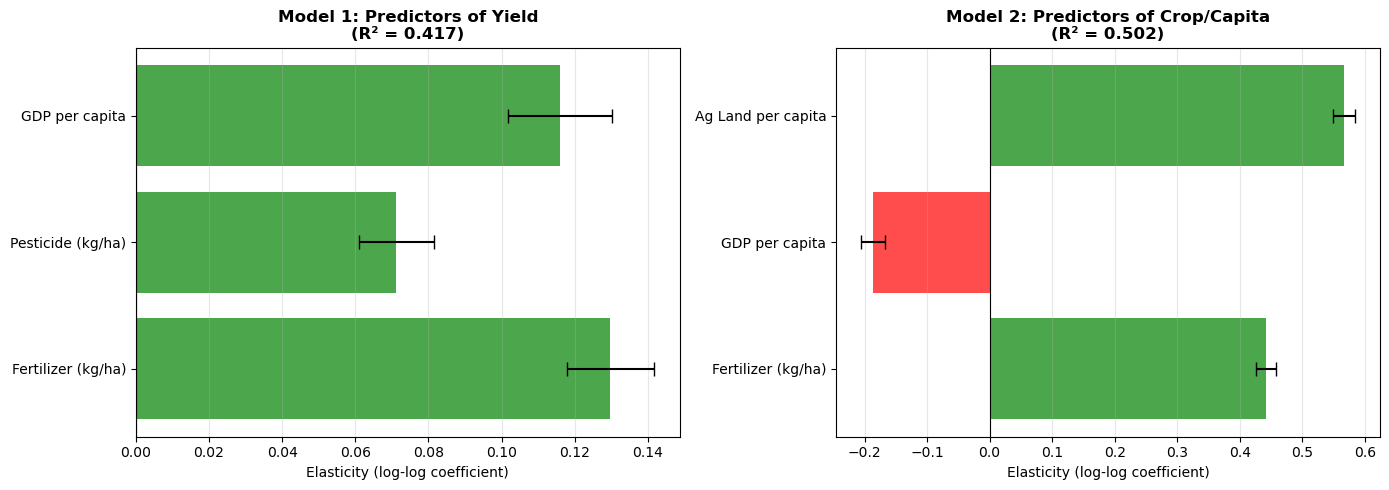

Note: Error bars show 95% confidence intervals


In [73]:
# 6.4 Visualize coefficient comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Model 1 coefficients (excluding constant)
ax1 = axes[0]
coefs1 = model1.params.drop("const")
errors1 = model1.bse.drop("const")
colors1 = ['green' if c > 0 else 'red' for c in coefs1]

y_pos = range(len(coefs1))
ax1.barh(y_pos, coefs1, xerr=errors1 * 1.96, color=colors1, alpha=0.7, capsize=5)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([
    "Fertilizer (kg/ha)", "Pesticide (kg/ha)", "GDP per capita"
])
ax1.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax1.set_xlabel("Elasticity (log-log coefficient)")
ax1.set_title(f"Model 1: Predictors of Yield\n(R² = {model1.rsquared:.3f})", fontweight='bold')
ax1.grid(True, alpha=0.3, axis='x')

# Model 2 coefficients (excluding constant)
ax2 = axes[1]
coefs2 = model2.params.drop("const")
errors2 = model2.bse.drop("const")
colors2 = ['green' if c > 0 else 'red' for c in coefs2]

y_pos = range(len(coefs2))
ax2.barh(y_pos, coefs2, xerr=errors2 * 1.96, color=colors2, alpha=0.7, capsize=5)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([
    "Fertilizer (kg/ha)", "GDP per capita", "Ag Land per capita"
])
ax2.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax2.set_xlabel("Elasticity (log-log coefficient)")
ax2.set_title(f"Model 2: Predictors of Crop/Capita\n(R² = {model2.rsquared:.3f})", fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("Note: Error bars show 95% confidence intervals")

# Section 7: Summary & Key Findings

## Main Takeaways from this Analysis:

1. DISTRIBUTION PATTERNS:
   - All agricultural metrics are highly right-skewed
   - Most countries cluster at low input intensity; a few are extreme outliers
   - Log transformations normalize distributions, supporting log-log analysis

2. KEY RELATIONSHIPS:
   - Fertilizer intensity correlates positively with yield, but with diminishing returns
   - Pesticide use shows weaker association with yield than fertilizer
   - GDP per capita predicts higher input use AND higher yields
   - Resource efficiency (output/input) often DECREASES with wealth

3. EFFICIENCY PATTERNS:
   - "Efficient" systems: achieve high yields with below-median chemical inputs
   - "Inefficient" systems: use high inputs but don't achieve proportional yields
   - Countries with good soil, climate, and farming practices can achieve
     high yields without extreme input intensification

4. REGRESSION FINDINGS:
   - Fertilizer intensity is the strongest predictor of yield among inputs
   - GDP captures broader development effects (technology, infrastructure, etc.)
   - Agricultural land availability per capita matters for food security
   - The models explain substantial but not all variation - many factors unobserved (r squared is only .417 and .502 for model 1 and 2 respectively, meaning this analysis only accounted for about half of the variation)

5. POLICY IMPLICATIONS:
   - Simply increasing chemical inputs is not a path to food security
   - Diminishing returns suggest optimizing input use, not maximizing it
   - Efficient countries show high yields are possible with moderate inputs
   - Focus on agricultural technology, soil health, and farming practices
     may be more sustainable than pure input intensification

## Data Dimension Summary

Total observations: 5713

Countries: 195

Year range: 1995 - 2023

Metrics created: 9 efficiency/intensity measures

Regression observations (complete cases): 4986